In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

In [31]:
train = pd.read_csv("/content/Train_Data_Final.csv")
test = pd.read_csv("/content/Test_Data.csv")


In [10]:
train.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0  2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1  2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2  2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3  2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4  2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T        AH            RH_type  id  
0  13.60  0.757754              Ideal   1  
1  13.30  0.725487              Ideal   2  
2  11.90  0.750239  Slightly Elevated   3  
3  11.00  0.786713  Slightly Elevated   4  
4  11.15  0.788794  Slightly Elevated   5

In [4]:
train.describe()

CO(GT)  PT08.S1(CO)    NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  8000.000000  8000.000000  8000.00000  8000.000000    8000.000000   
mean    -39.616450  1051.229542  -152.15075     2.853485     911.693740   
std      81.895617   324.514858   150.07985    39.972683     339.978463   
min    -200.000000  -200.000000  -200.00000  -200.000000    -200.000000   
25%       0.500000   917.000000  -200.00000     4.293956     726.750000   
50%       1.500000  1051.250000  -200.00000     8.279845     910.625000   
75%       2.600000  1225.000000  -200.00000    14.152558    1121.562500   
max      11.900000  2039.750000  1189.00000    63.741476    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  8000.000000   8000.000000  8000.000000   8000.000000  8000.000000   
mean    149.083150    810.813437    45.164963   1445.371906   979.734292   
std     260.591289    321.352129   129.313917    455.400332   449.183717   
min    -200.000000   -200.000000  -200.000000   -200.000000  -200.000000   
25%      39.000000    651.937500    44.000000   1275.187500   709.937500   
50%     122.000000    806.750000    90.000000   1493.375000   942.000000   
75%     259.175000    975.500000   125.000000   1697.750000  1253.437500   
max    1479.000000   2682.750000   332.600000   2775.000000  2522.750000   

                 T           AH          id  
count  8000.000000  8000.000000  8000.00000  
mean     11.542394    -6.182181  4000.50000  
std      41.830243    37.526459  2309.54541  
min    -200.000000  -200.000000     1.00000  
25%      12.325000     0.779140  2000.75000  
50%      18.700000     1.031560  4000.50000  
75%      25.125000     1.358336  6000.25000  
max      44.600000     2.231036  8000.00000

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8000 non-null   object 
 1   Time           8000 non-null   object 
 2   CO(GT)         8000 non-null   float64
 3   PT08.S1(CO)    8000 non-null   float64
 4   NMHC(GT)       8000 non-null   int64  
 5   C6H6(GT)       8000 non-null   float64
 6   PT08.S2(NMHC)  8000 non-null   float64
 7   NOx(GT)        8000 non-null   float64
 8   PT08.S3(NOx)   8000 non-null   float64
 9   NO2(GT)        8000 non-null   float64
 10  PT08.S4(NO2)   8000 non-null   float64
 11  PT08.S5(O3)    8000 non-null   float64
 12  T              8000 non-null   float64
 13  AH             8000 non-null   float64
 14  RH_type        8000 non-null   object 
 15  id             8000 non-null   int64  
dtypes: float64(11), int64(2), object(3)
memory usage: 1000.1+ KB


In [ ]:
train.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
AH               0
RH_type          0
id               0
dtype: int64

In [ ]:
train.shape

(8000, 16)

In [ ]:
train['Time'].min() , train['Time'].max()

('00:00:00', '23:00:00')

In [ ]:
train['Date'].min() , train['Date'].max()

('2004-03-10', '2005-02-07')

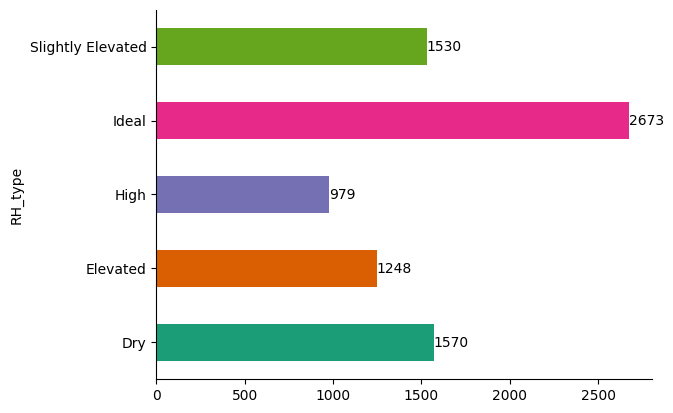

In [ ]:
ax = train.groupby('RH_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
ax.spines[['top','right']].set_visible(False)
for i, v in enumerate(train.groupby('RH_type').size()):
    ax.text(v + 0.1, i, str(v), color='black', va='center')
plt.show()

In [ ]:
train.RH_type.value_counts()

Ideal                2673
Dry                  1570
Slightly Elevated    1530
Elevated             1248
High                  979
Name: RH_type, dtype: int64

In [32]:
def encode_rh_type(rh_type):
    encoding_dict = {
        'Dry': 0,
        'Elevated': 1,
        'High': 2,
        'Ideal': 3,
        'Slightly Elevated': 4
    }
    return encoding_dict.get(rh_type)

train['RH_type'] = train['RH_type'].apply(encode_rh_type)

In [12]:
train.RH_type.value_counts()

3    2673
0    1570
4    1530
1    1248
2     979
Name: RH_type, dtype: int64

In [77]:
train.Date.value_counts()

2004-08-24    24
2004-10-25    24
2004-10-23    24
2004-10-22    24
2004-10-21    24
              ..
2004-06-26    24
2004-06-25    24
2005-02-05    24
2004-03-10     6
2005-02-07     2
Name: Date, Length: 335, dtype: int64

In [75]:
train.Time.value_counts()

18:00:00    334
20:00:00    334
21:00:00    334
22:00:00    334
23:00:00    334
00:00:00    334
01:00:00    334
19:00:00    334
10:00:00    333
16:00:00    333
15:00:00    333
14:00:00    333
13:00:00    333
12:00:00    333
11:00:00    333
06:00:00    333
09:00:00    333
08:00:00    333
07:00:00    333
05:00:00    333
04:00:00    333
03:00:00    333
02:00:00    333
17:00:00    333
Name: Time, dtype: int64

In [72]:
train.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'AH', 'RH_type', 'id'],
      dtype='object')

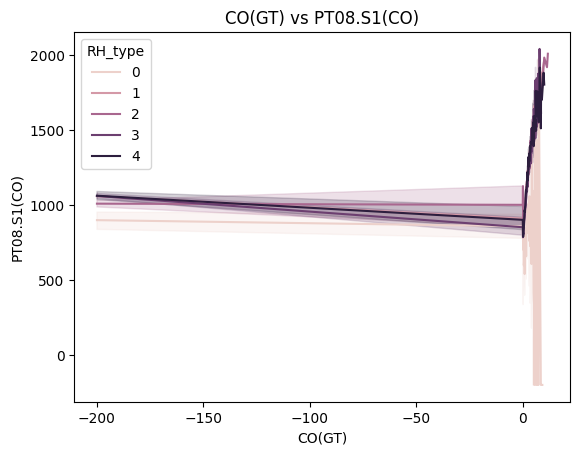

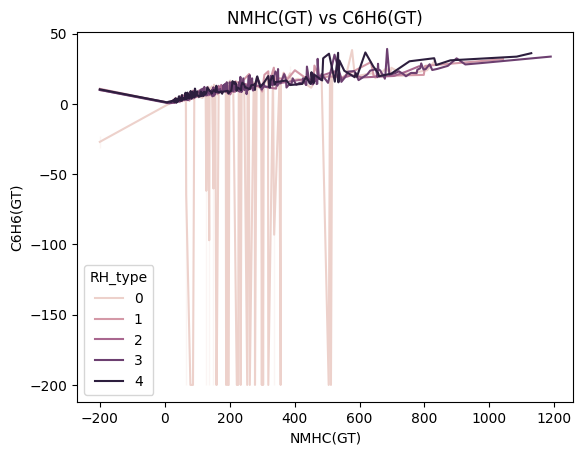

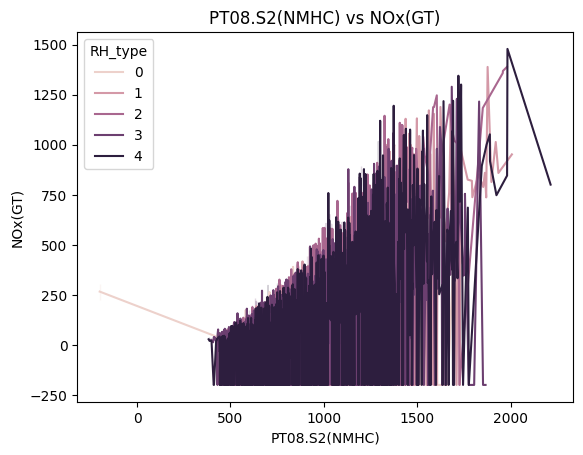

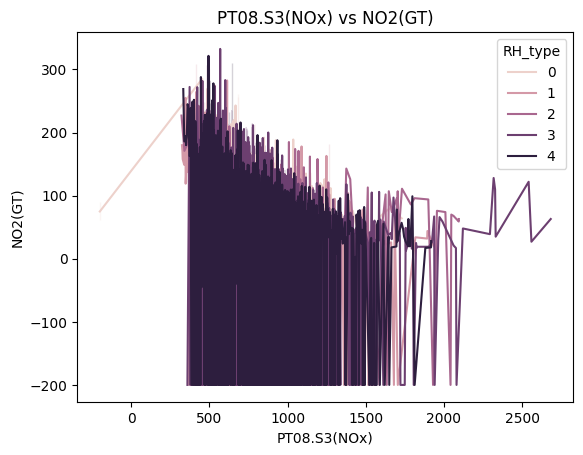

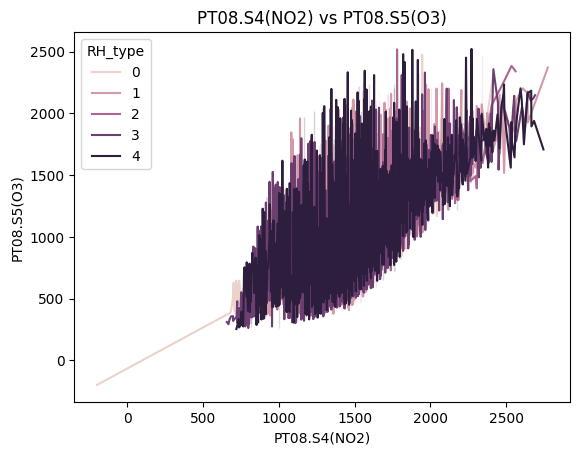

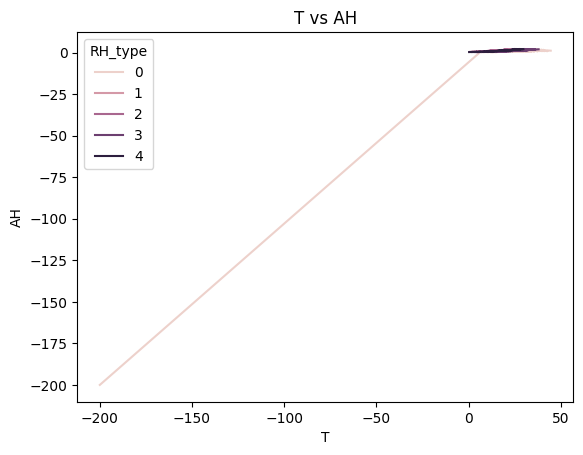

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns
columns = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
           'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
           'T', 'AH']

# Define pairs of columns for line graphs
column_pairs = [(columns[i], columns[i + 1]) for i in range(0, len(columns) - 1, 2)]

# Plot line graphs
for column1, column2 in column_pairs:
    sns.lineplot(data=train, x=column1, y=column2, hue='RH_type')
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.title(f'{column1} vs {column2}')
    plt.legend(title='RH_type')
    plt.show()


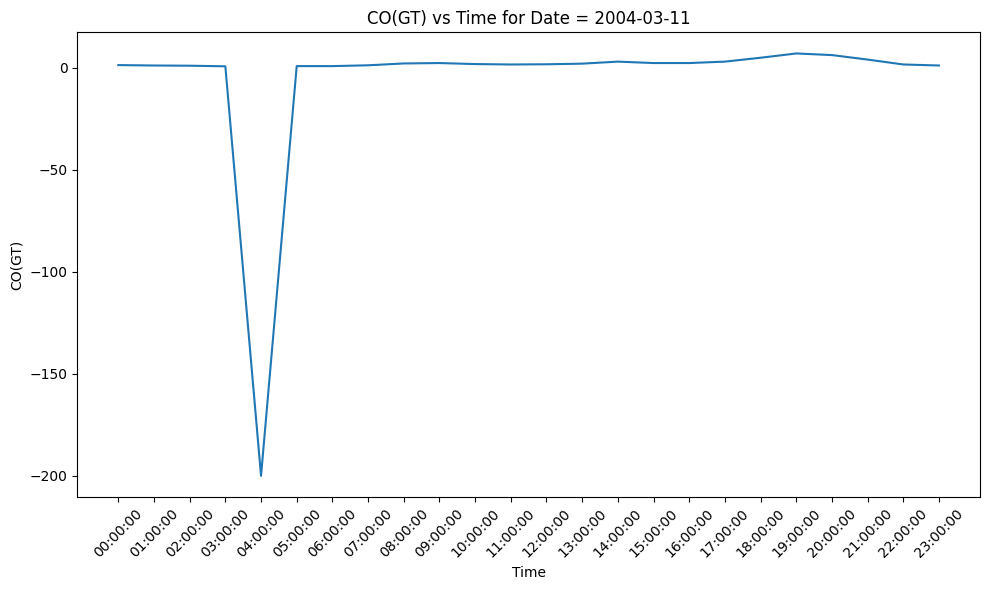

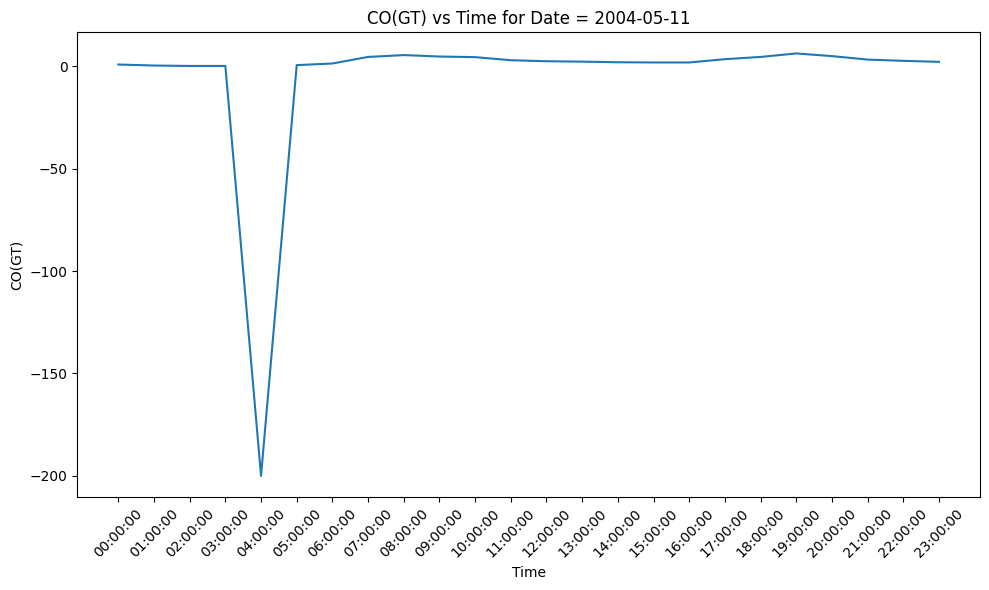

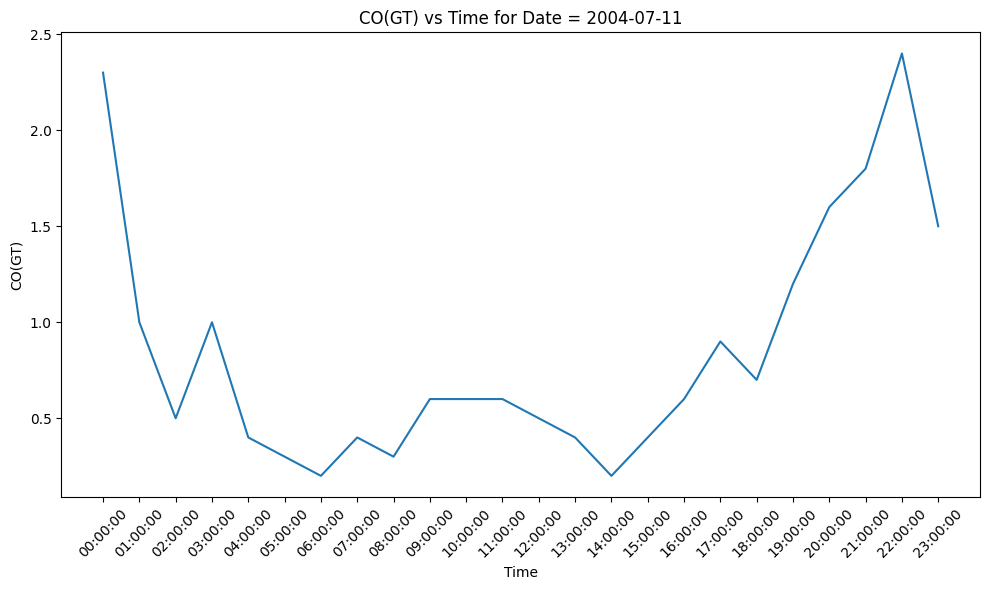

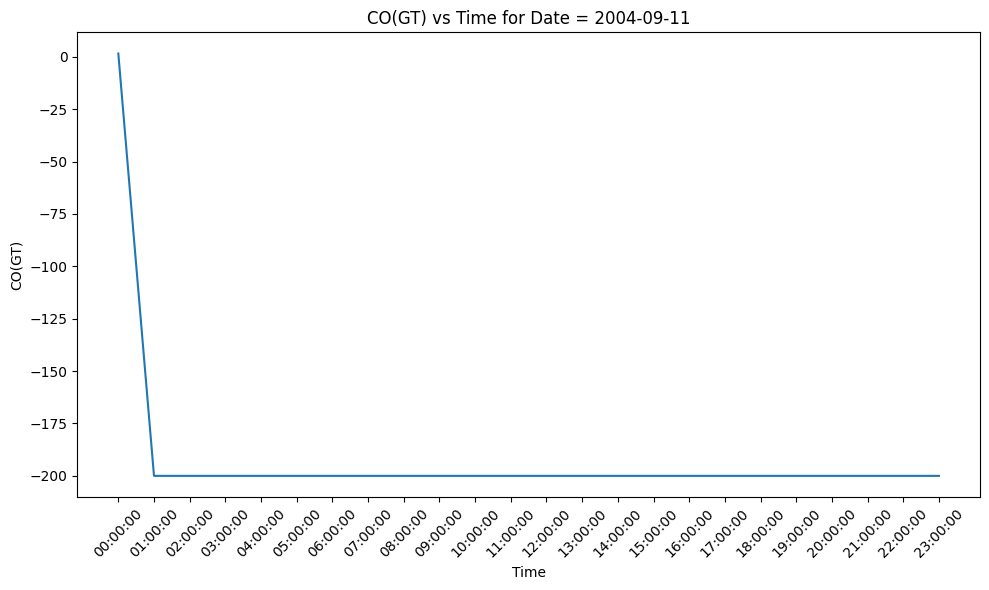

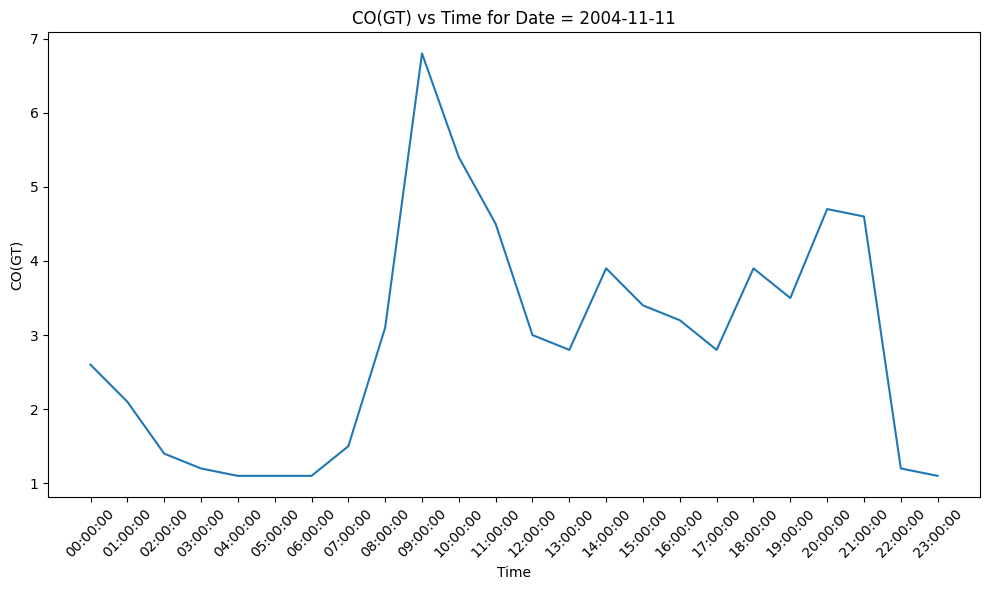

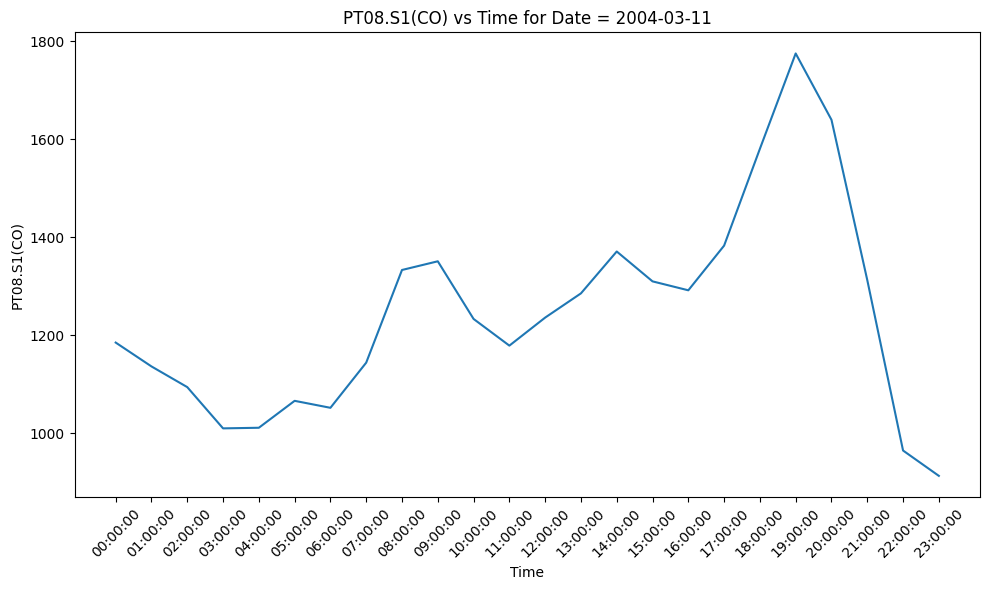

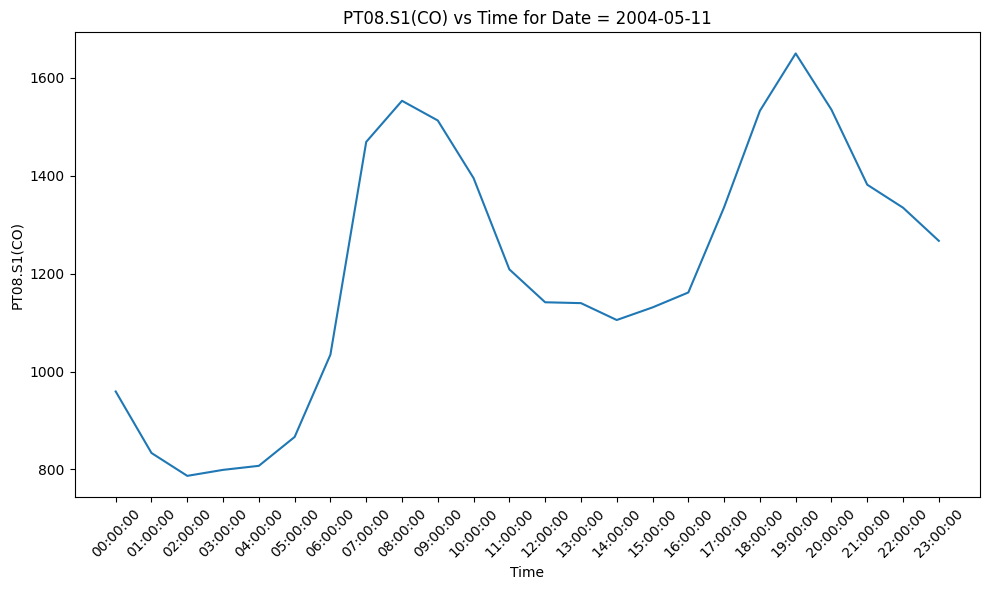

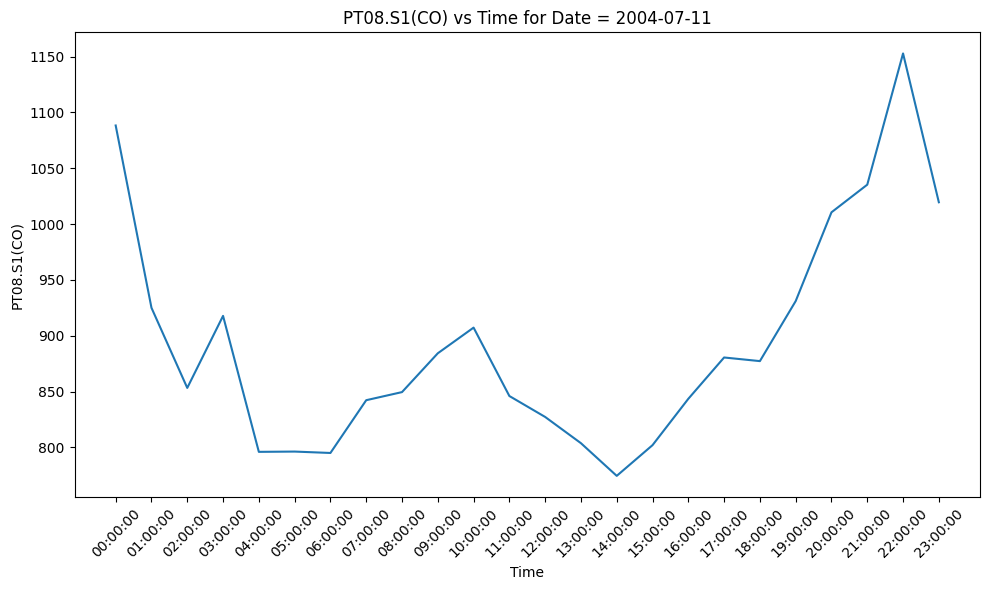

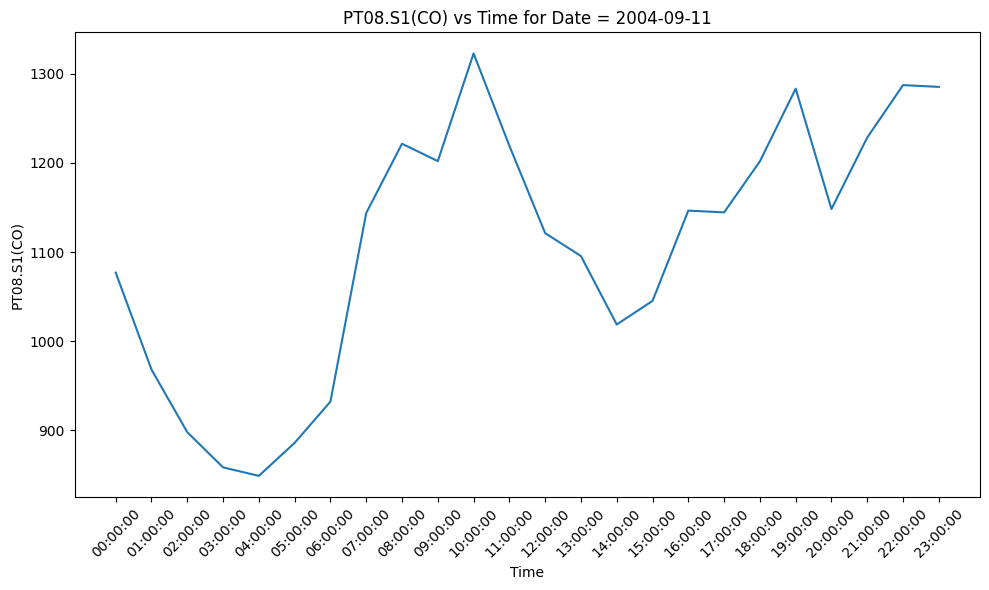

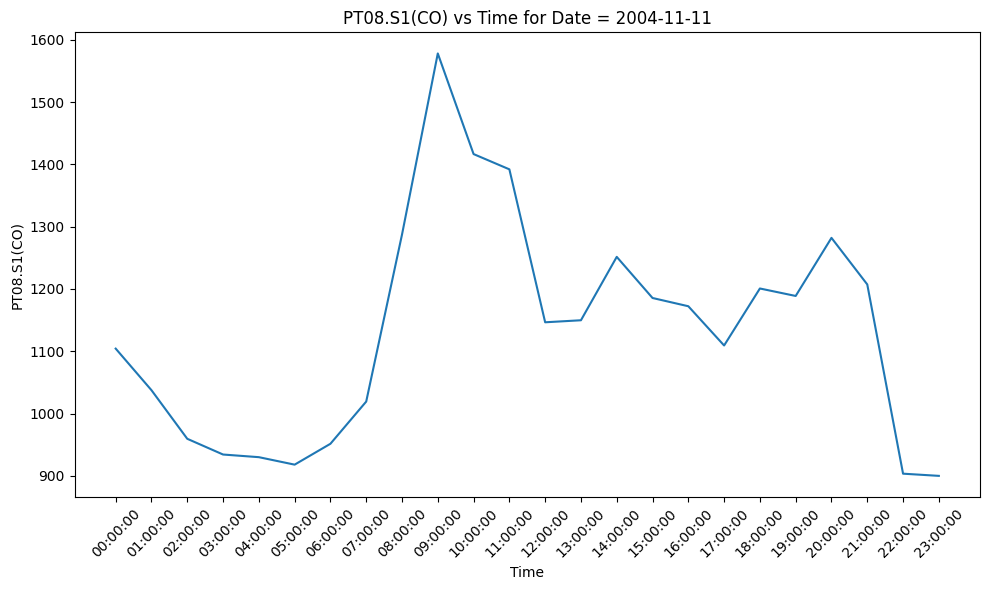

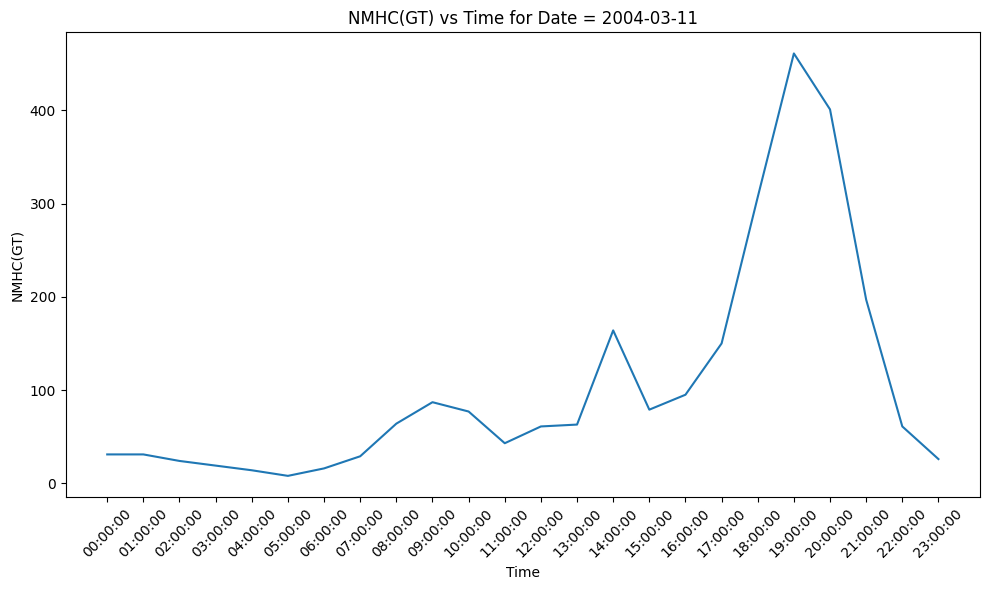

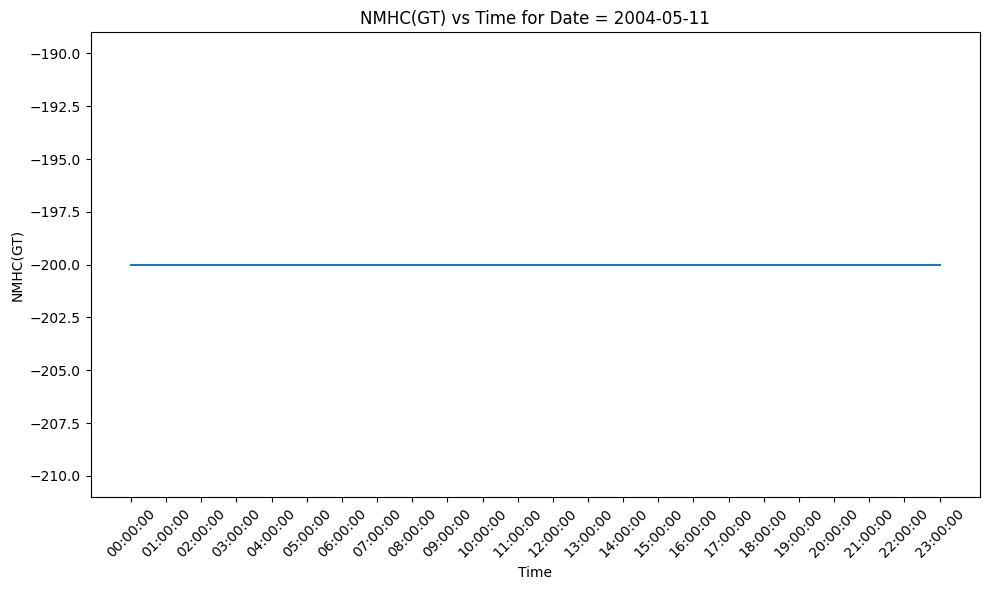

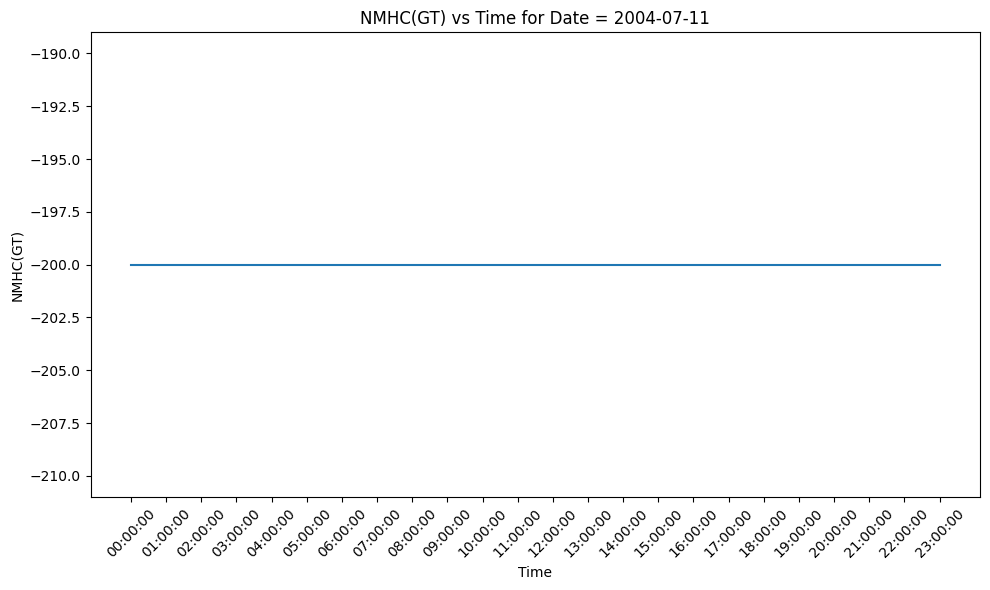

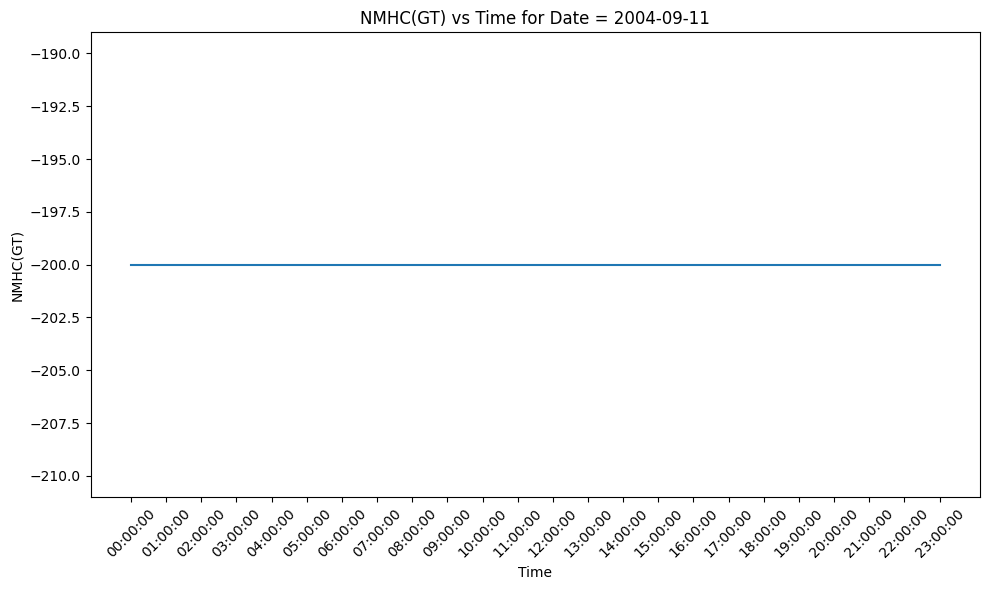

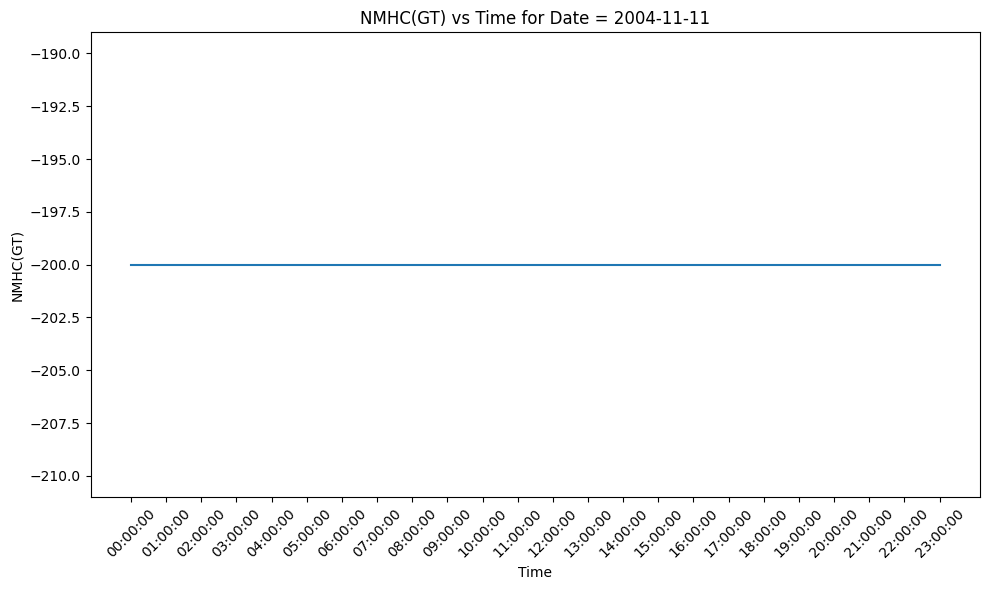

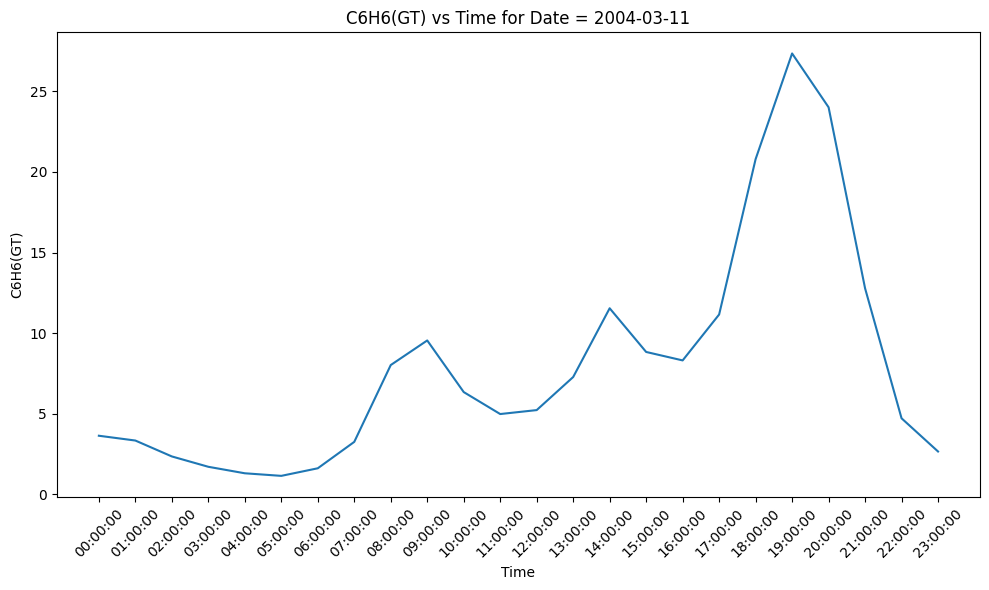

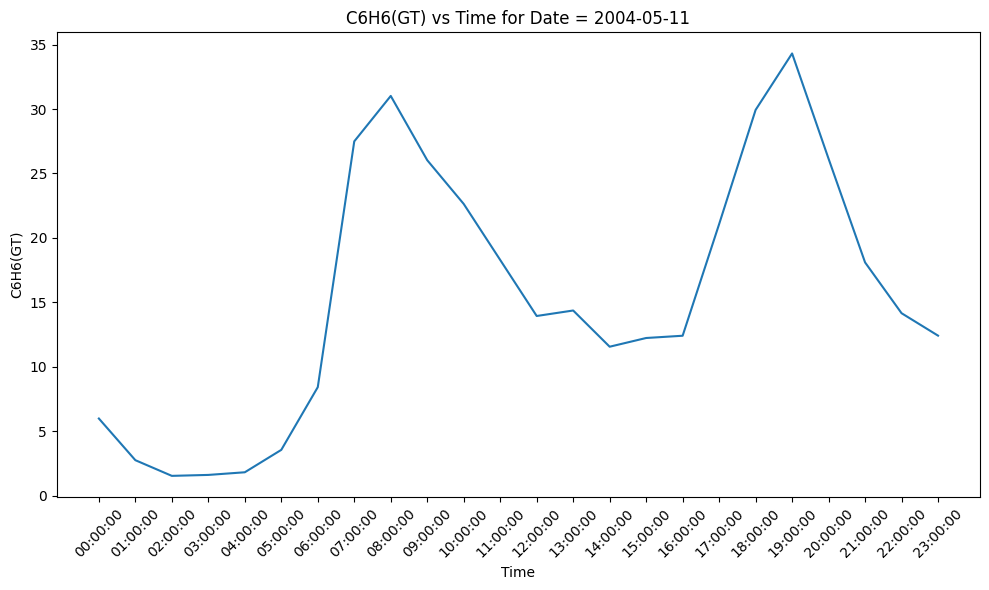

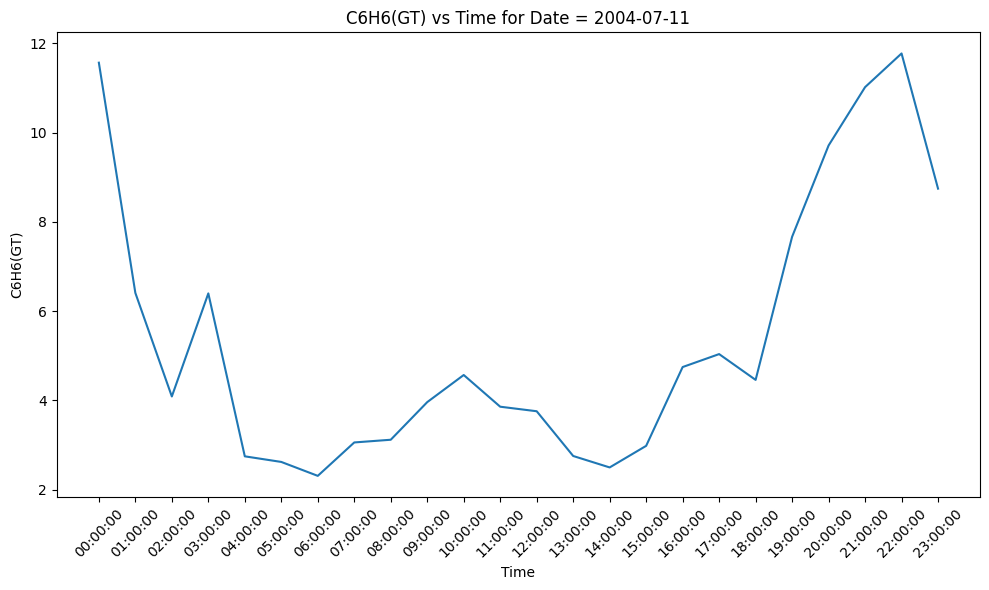

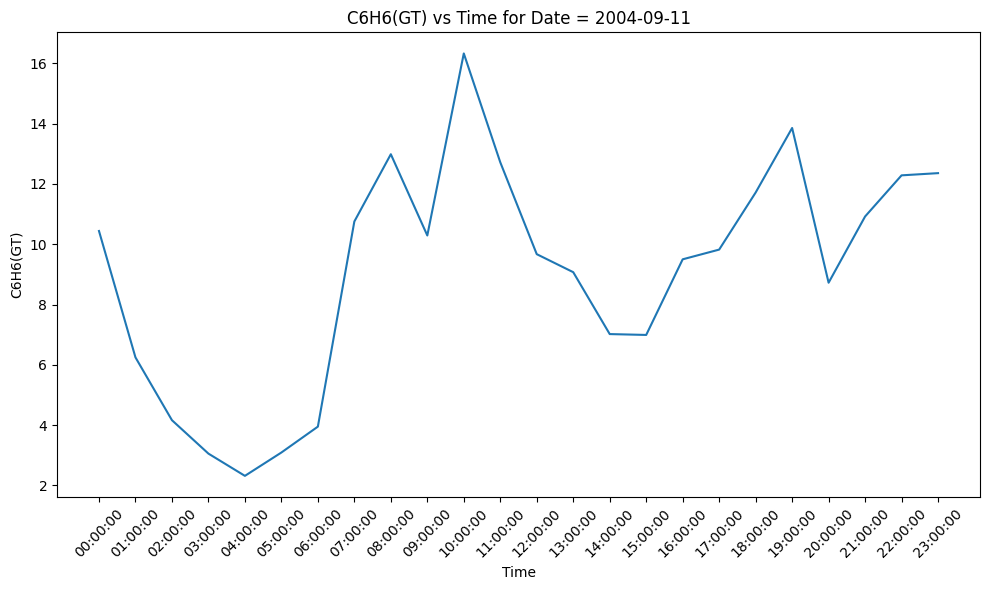

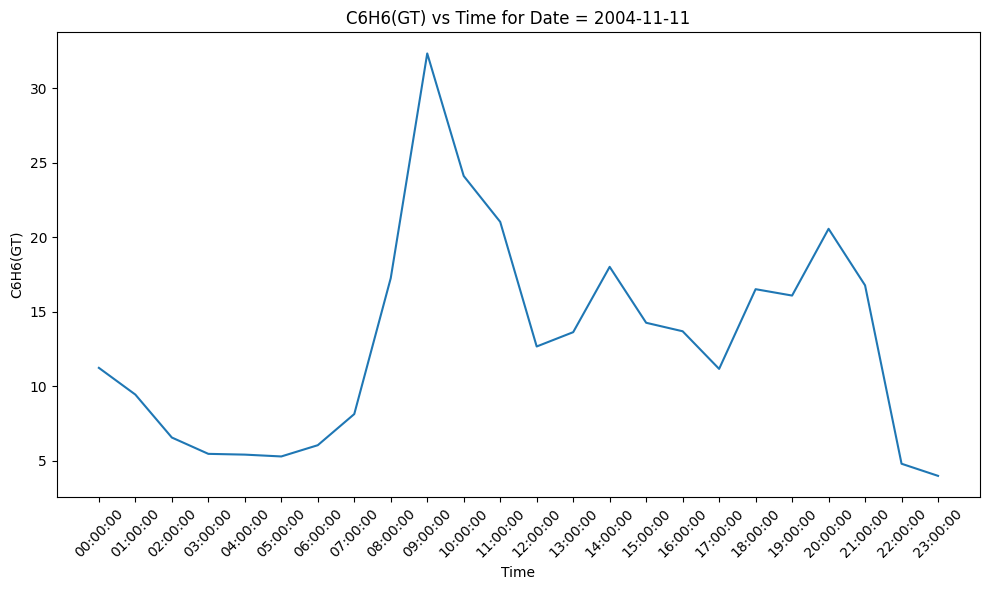

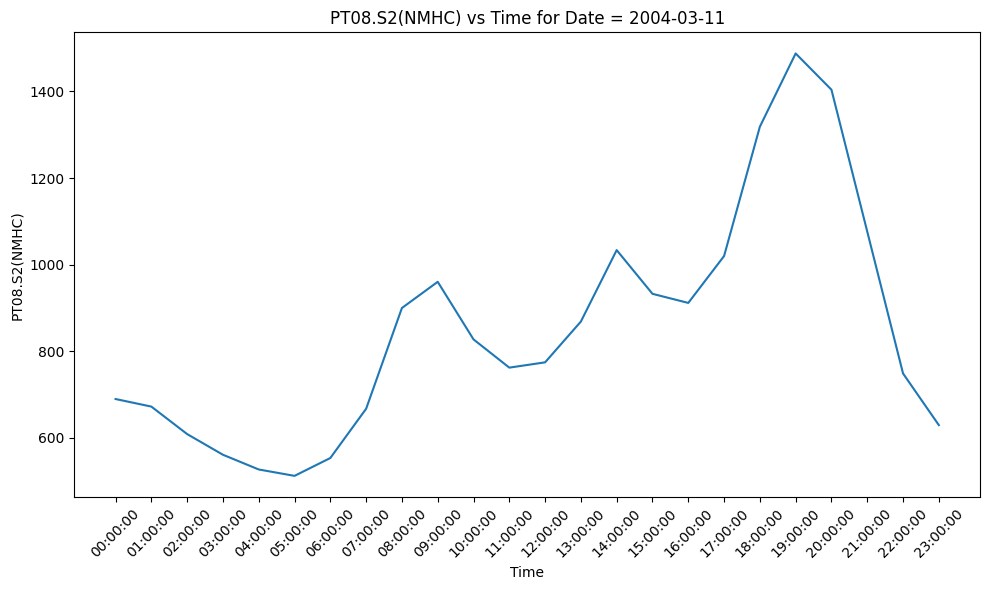

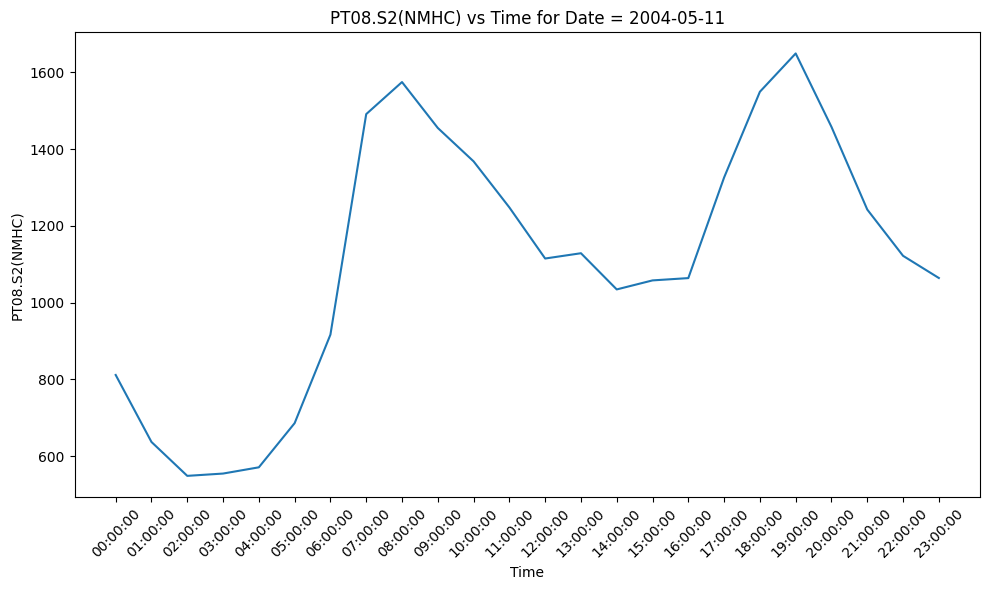

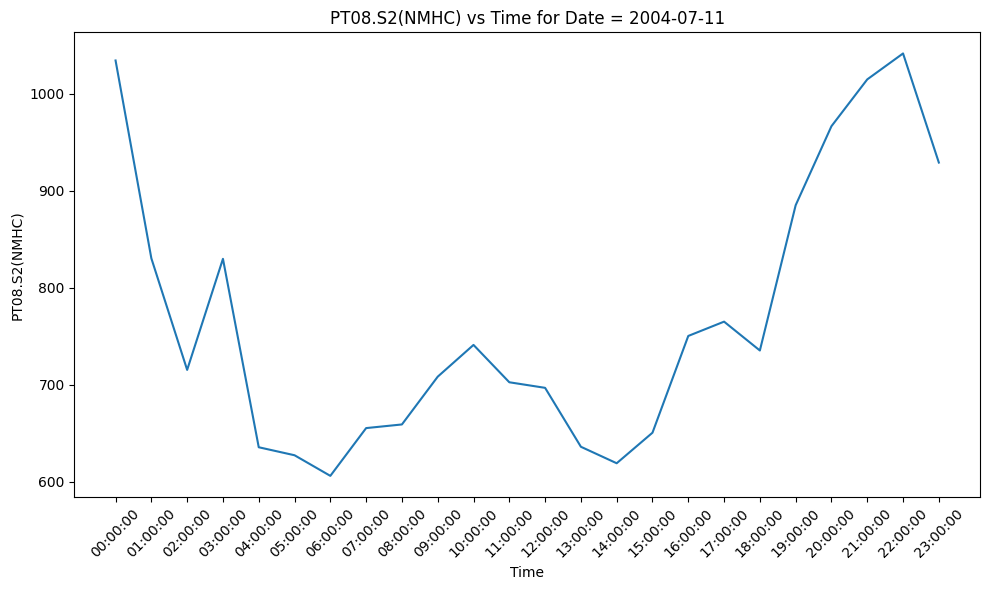

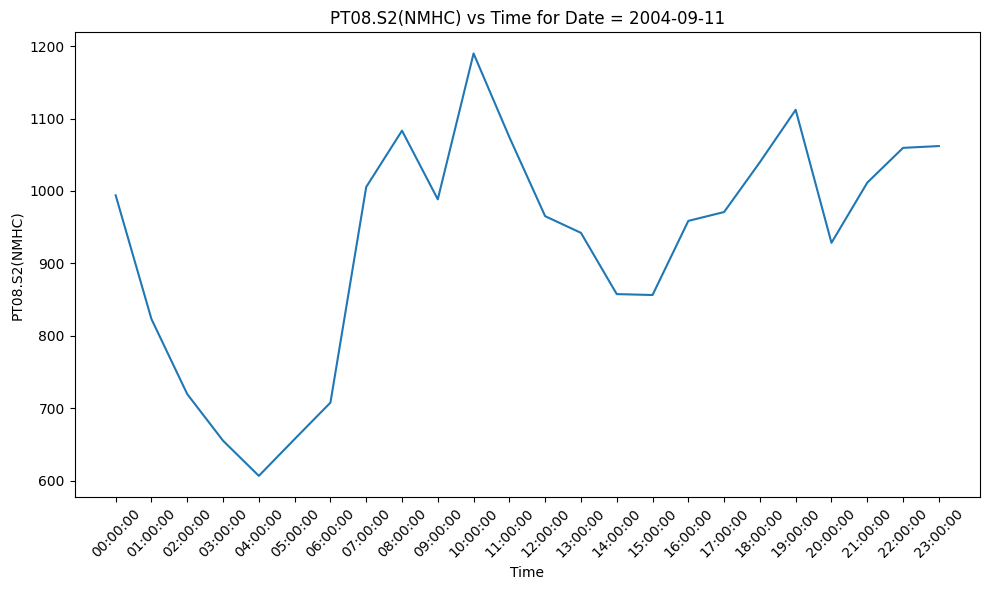

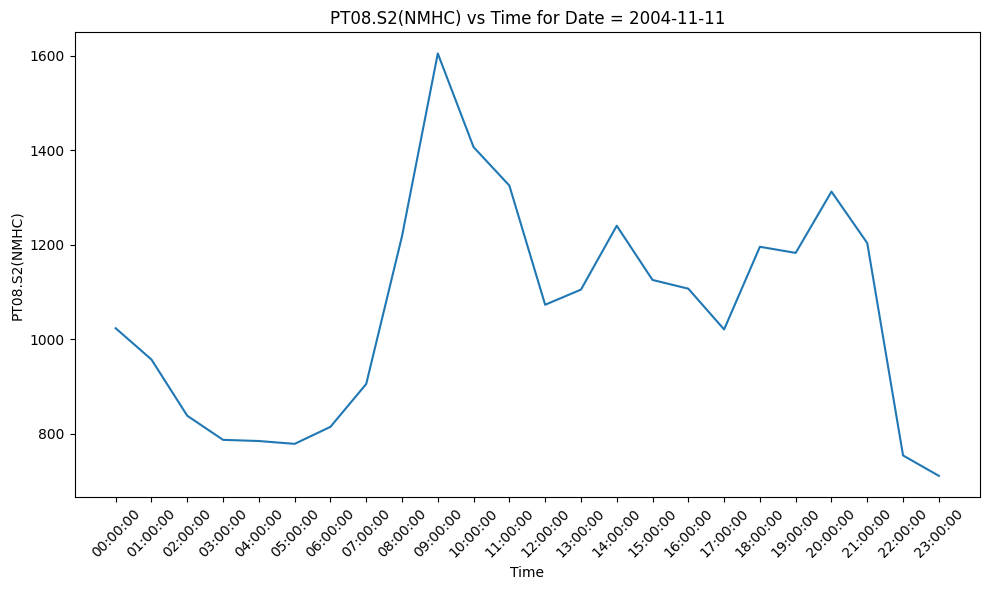

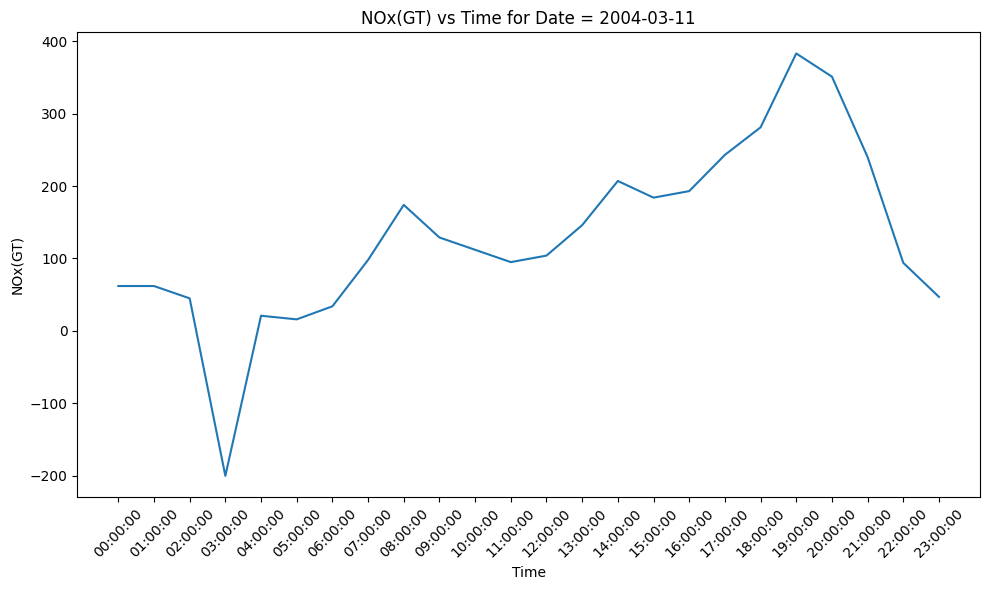

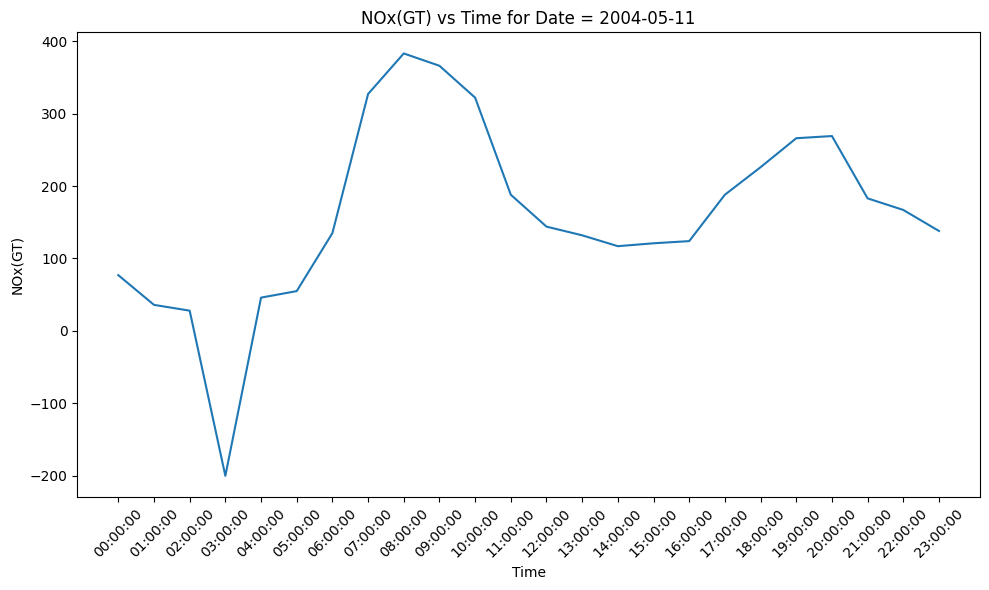

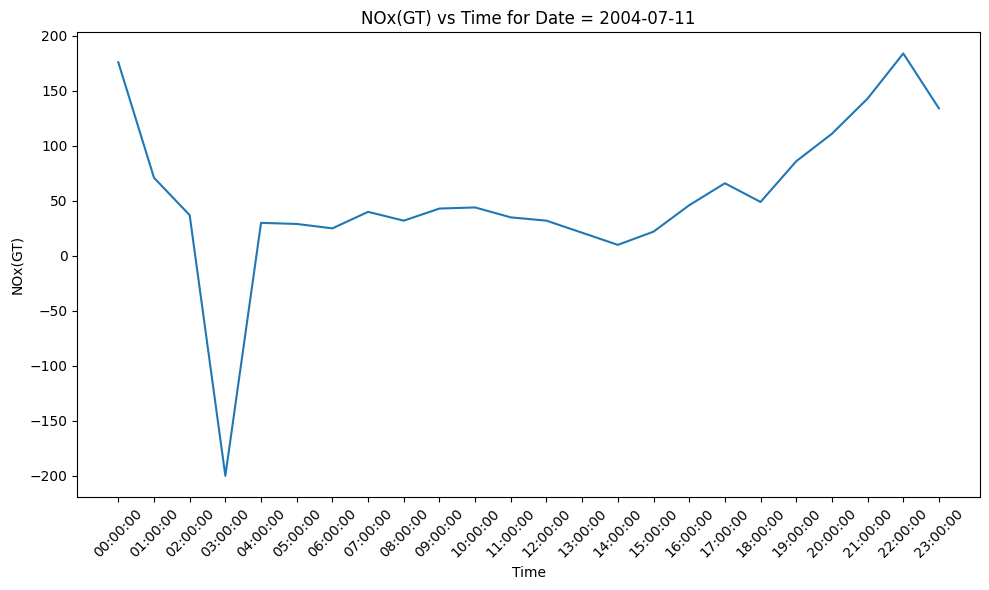

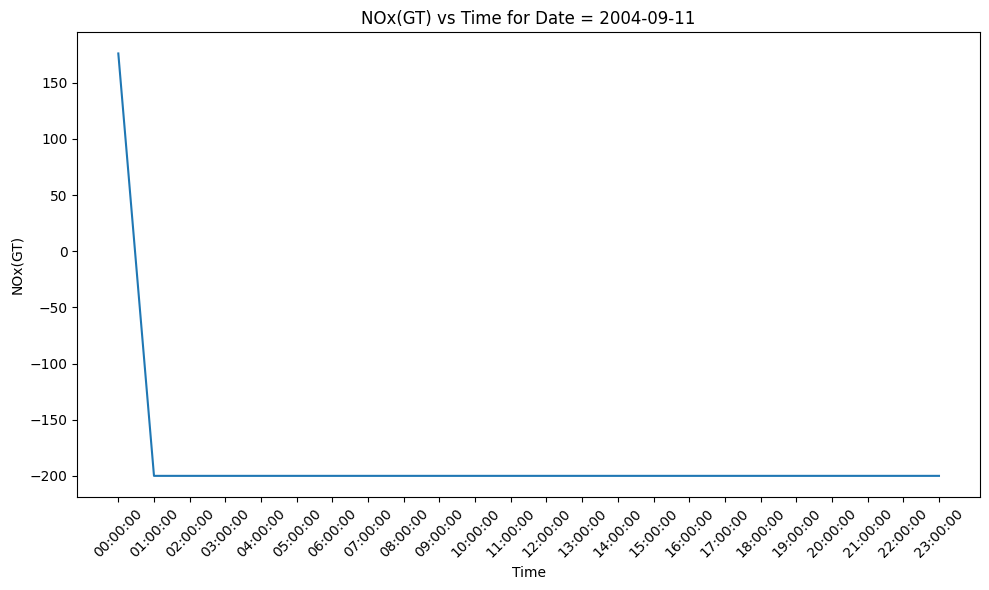

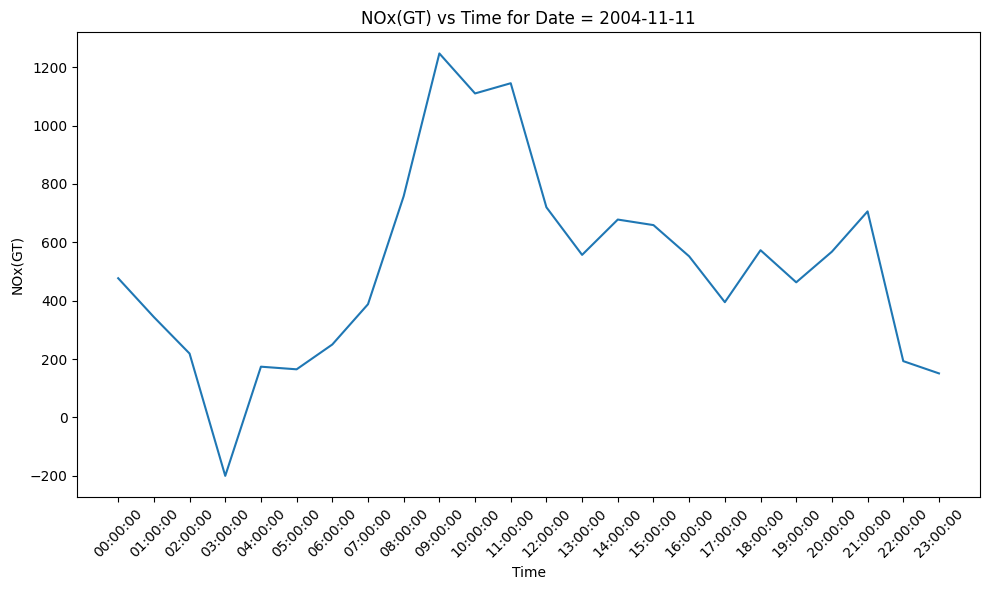

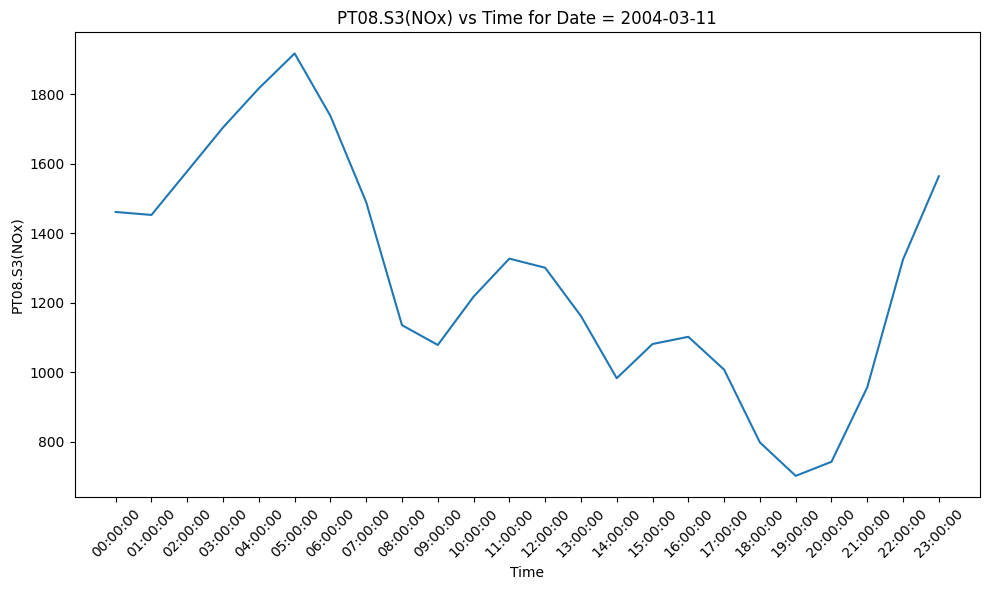

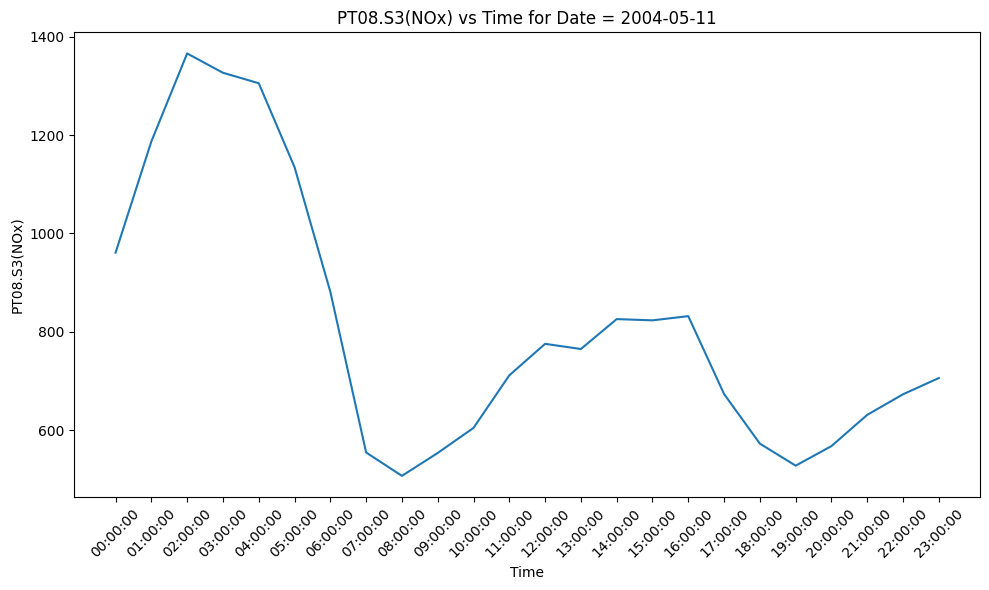

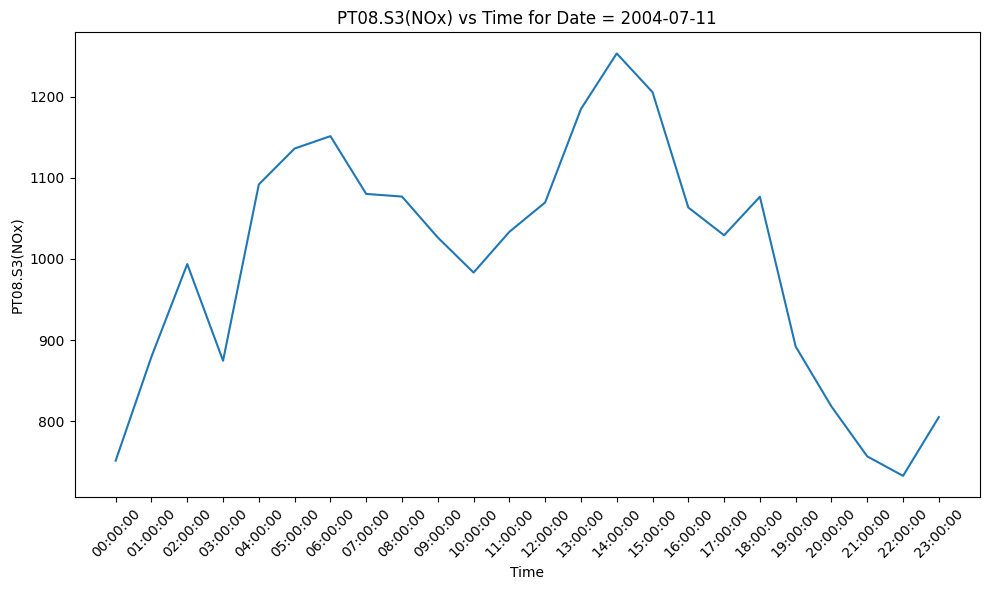

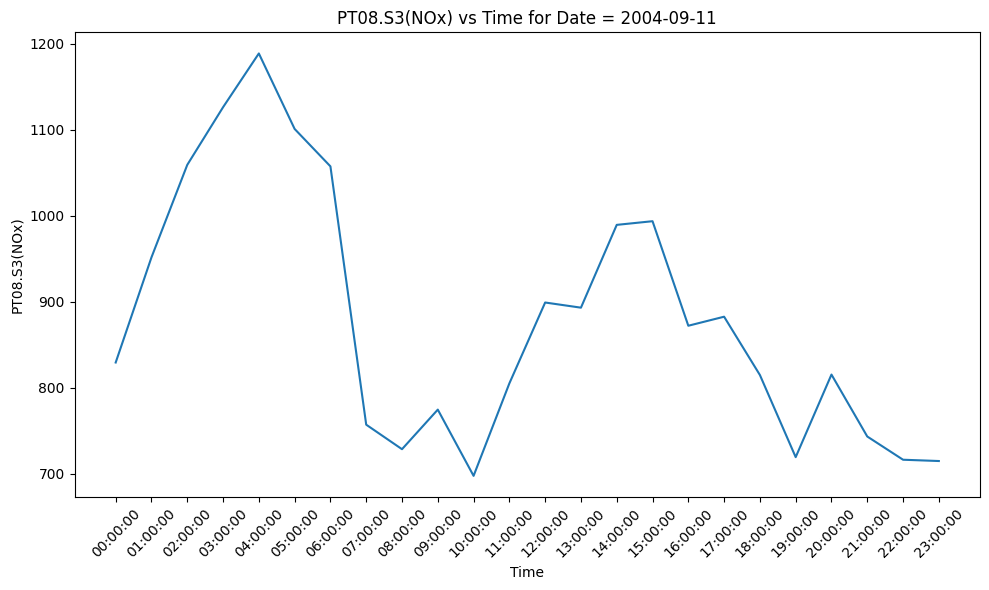

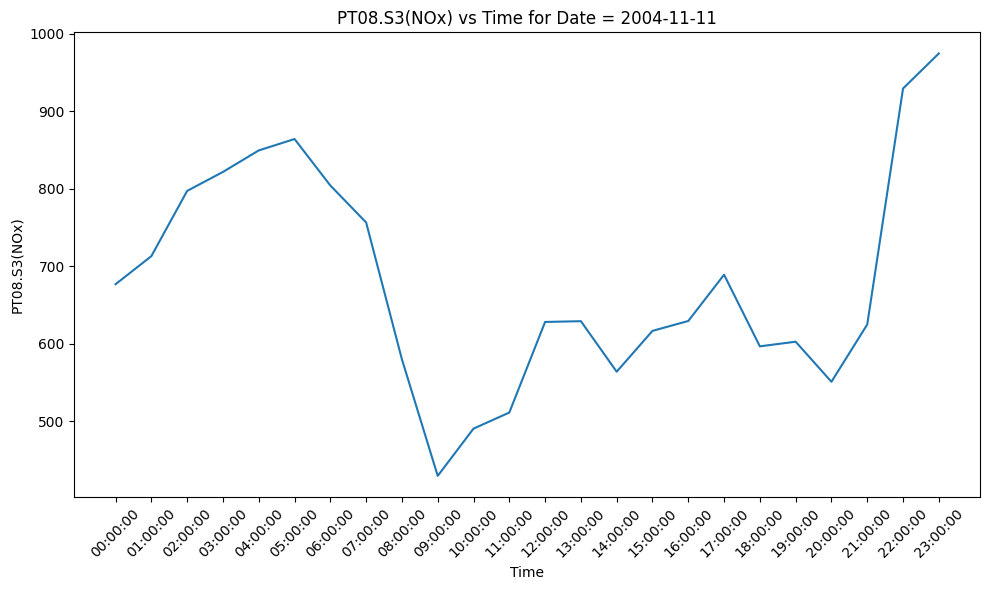

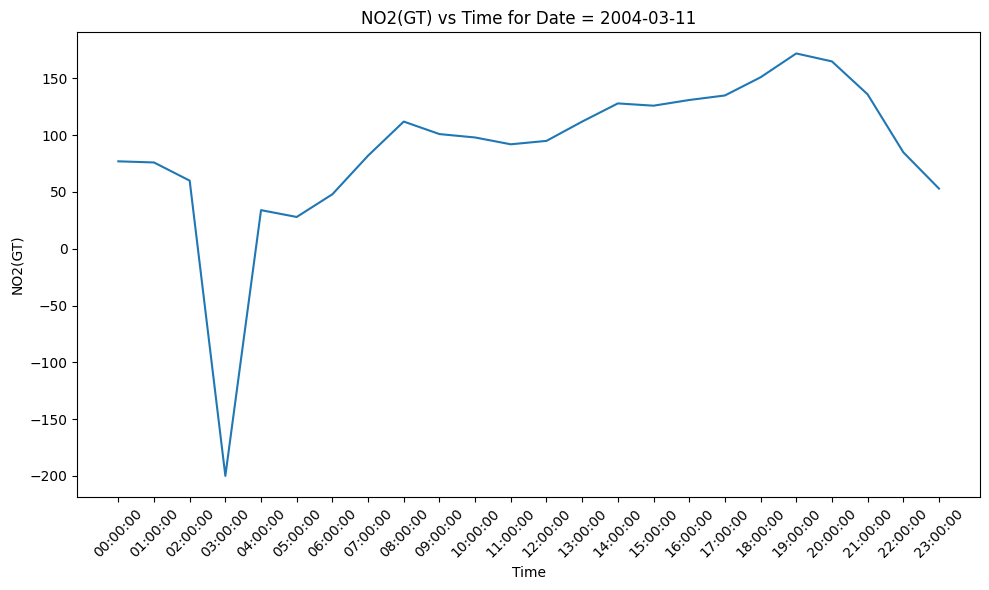

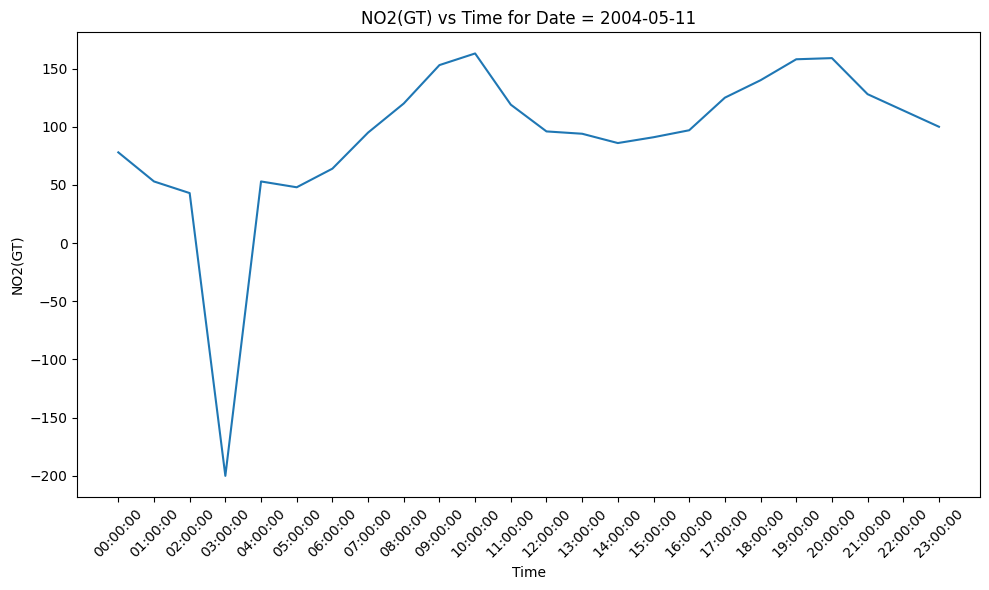

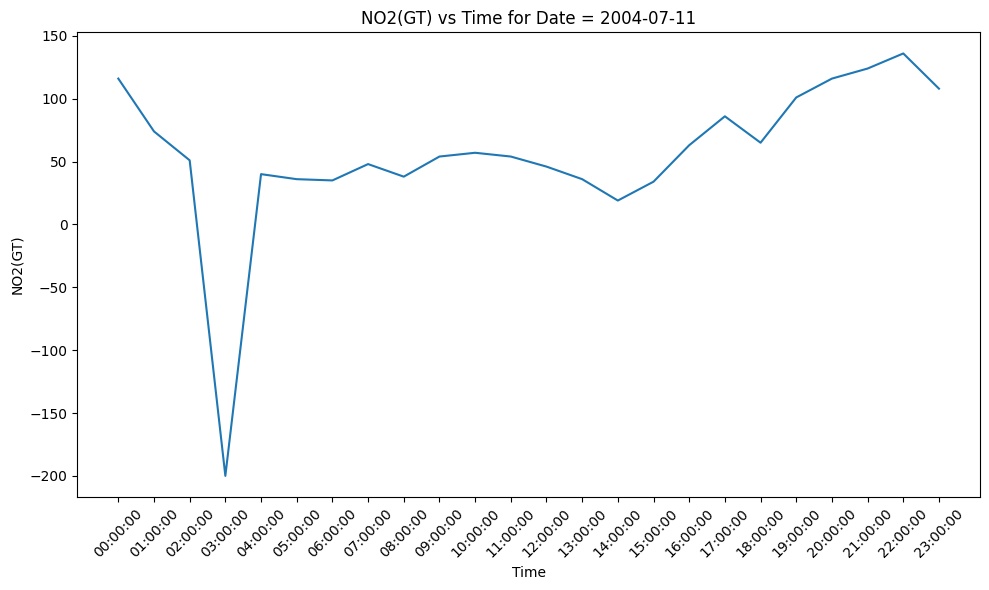

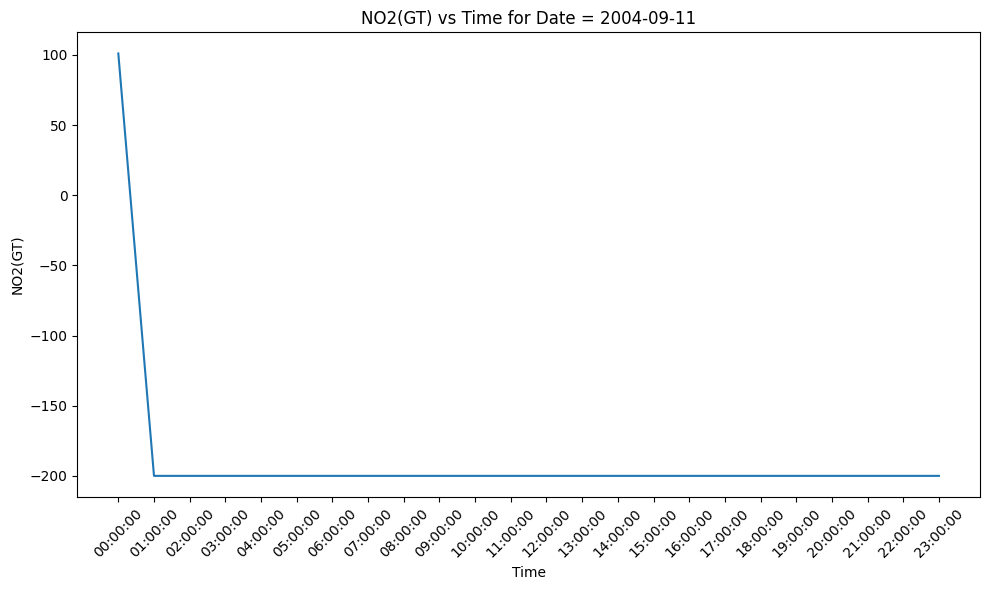

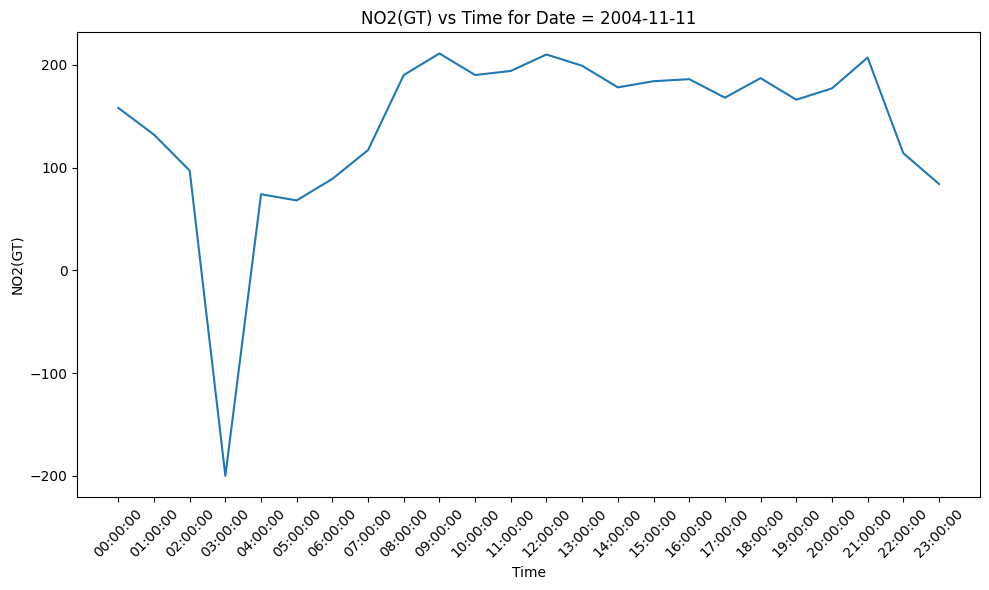

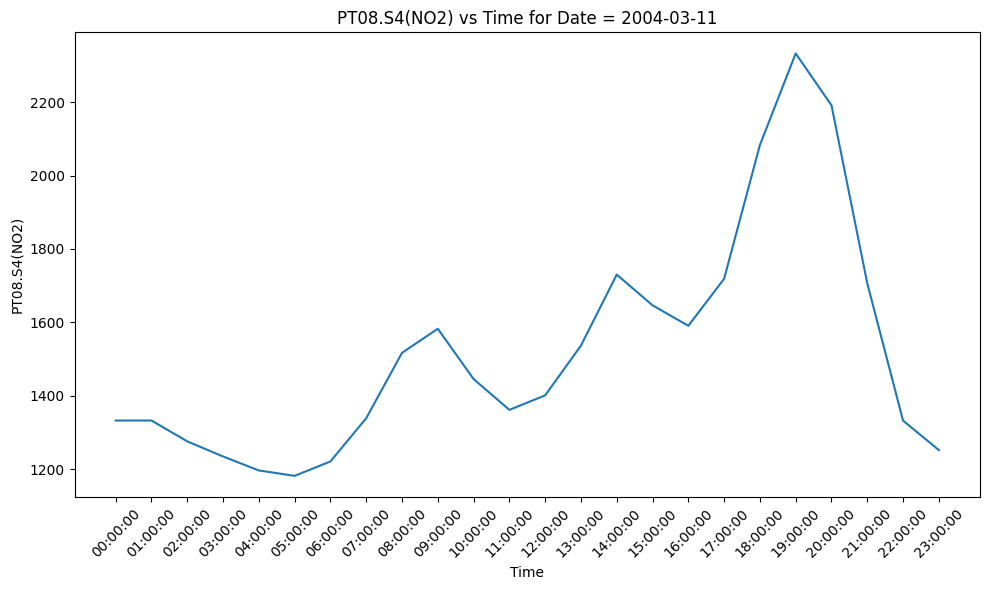

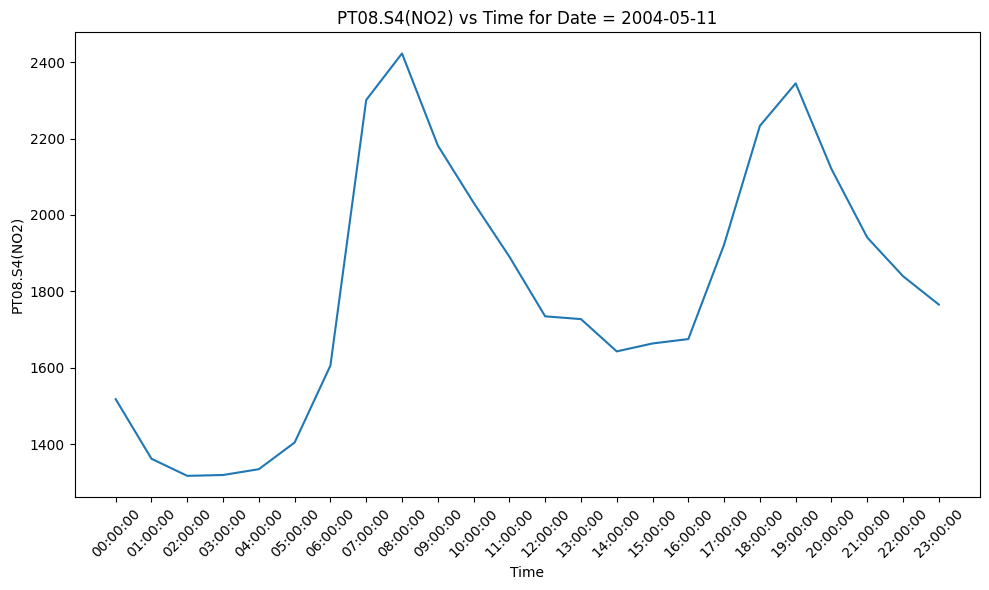

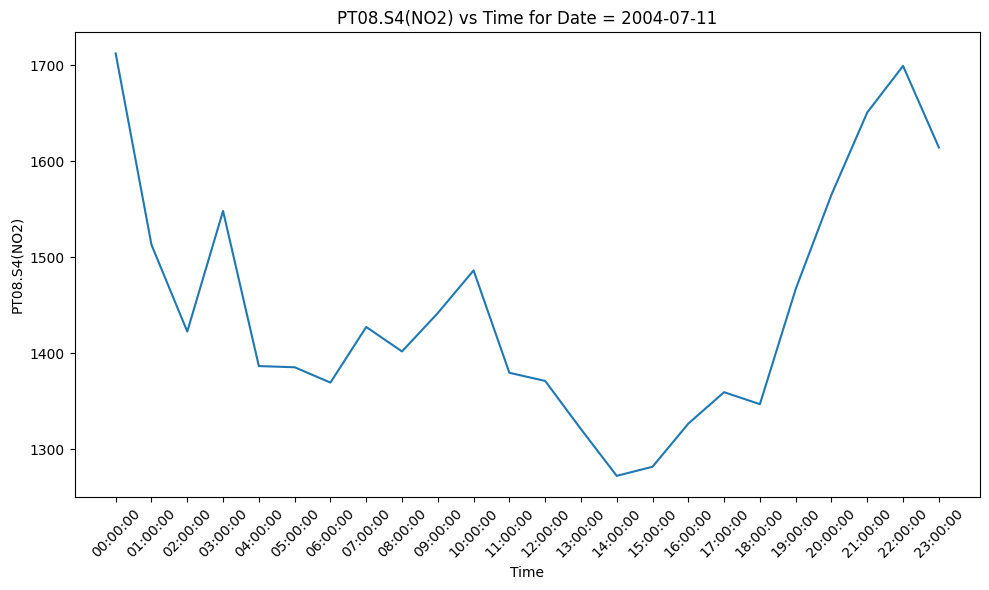

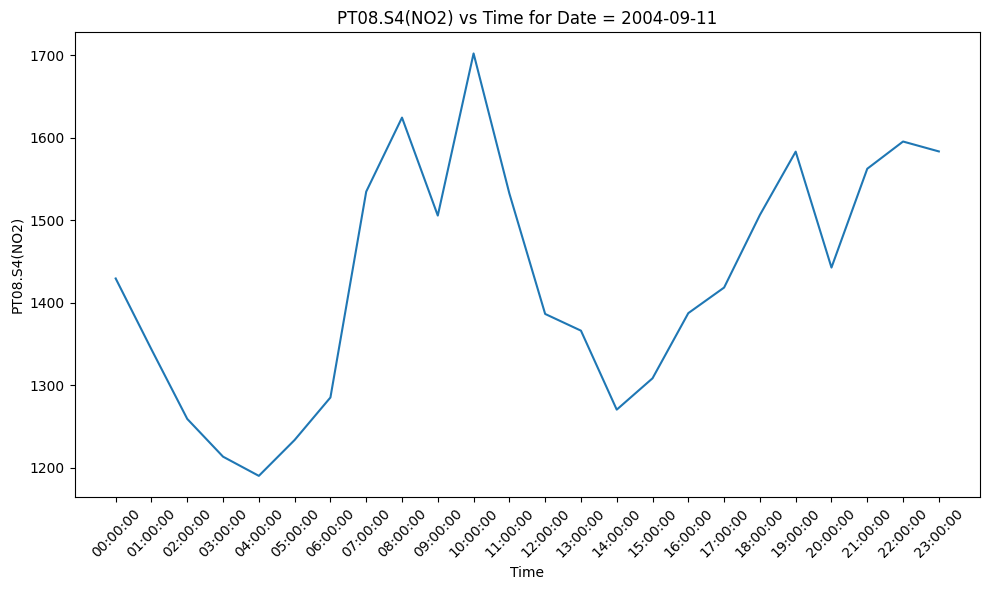

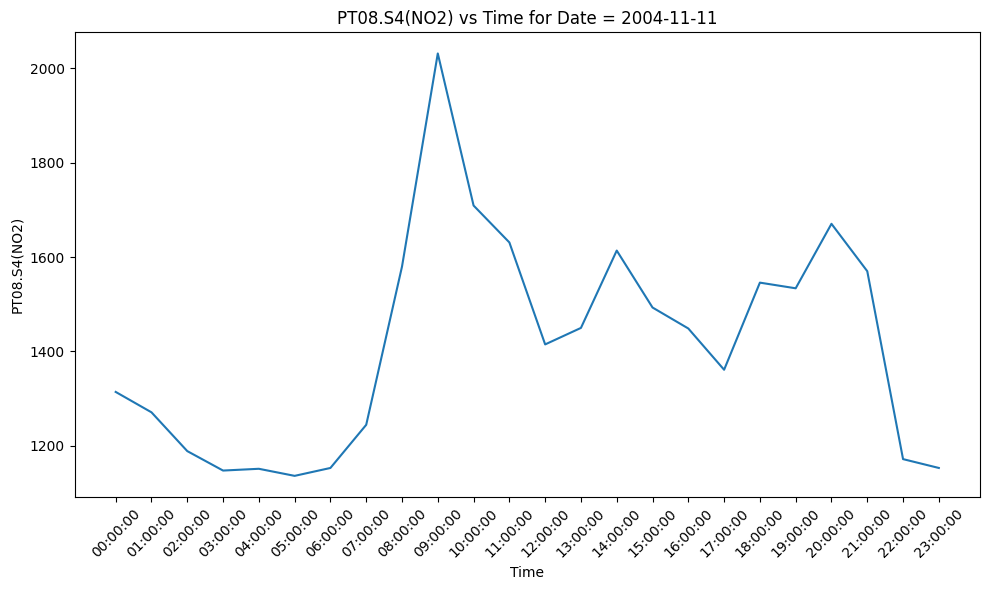

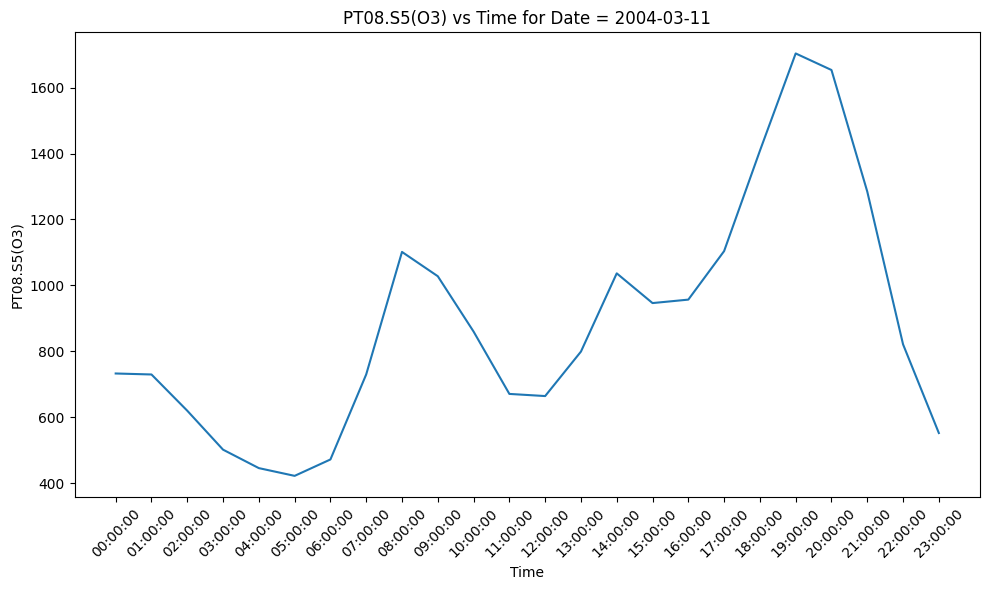

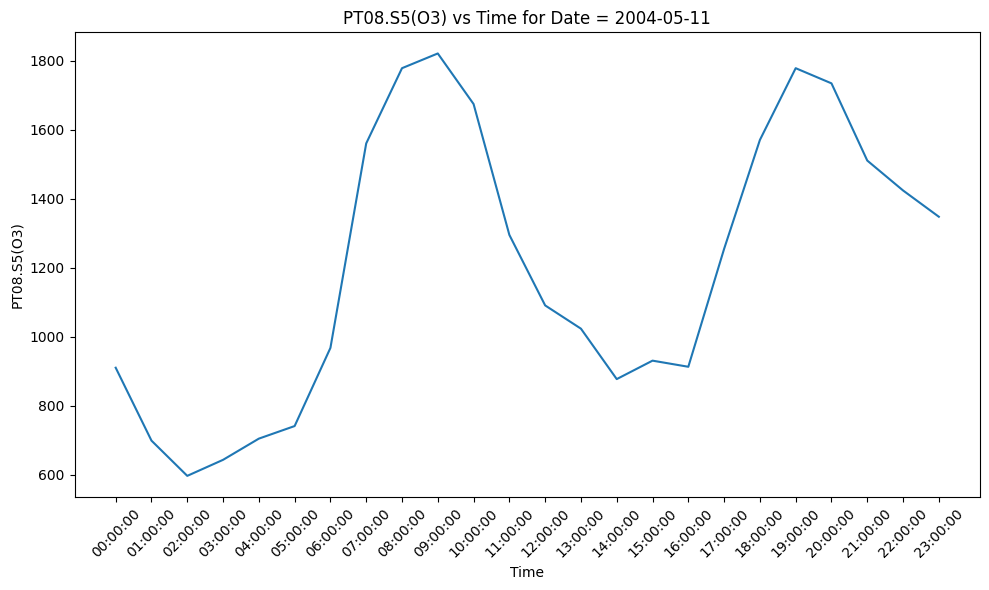

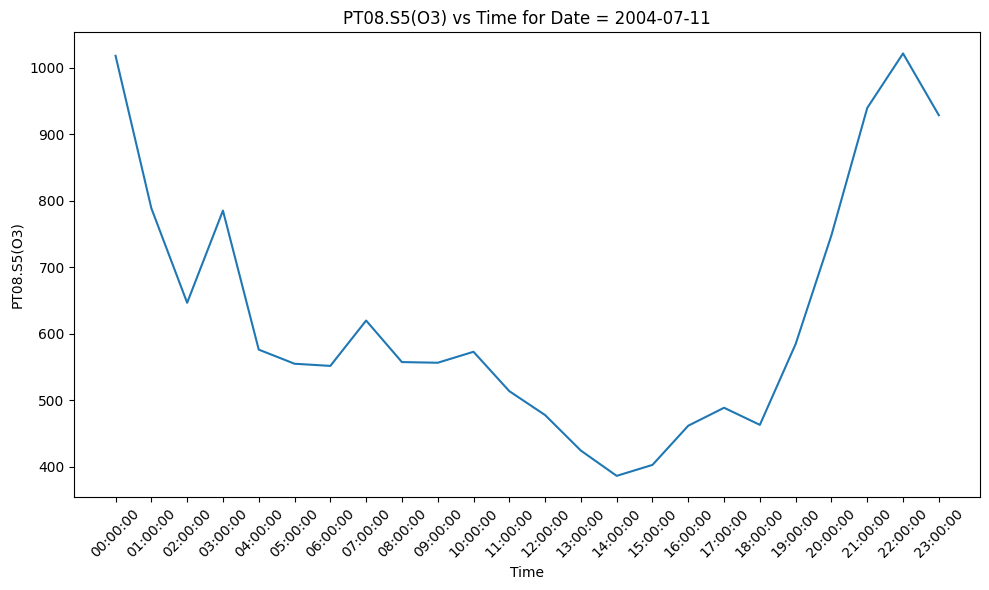

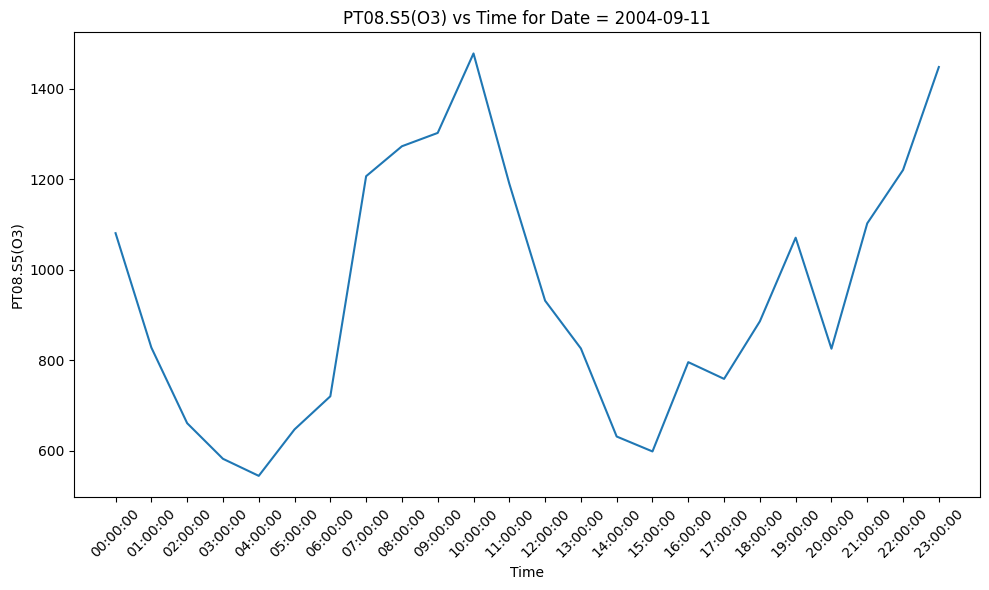

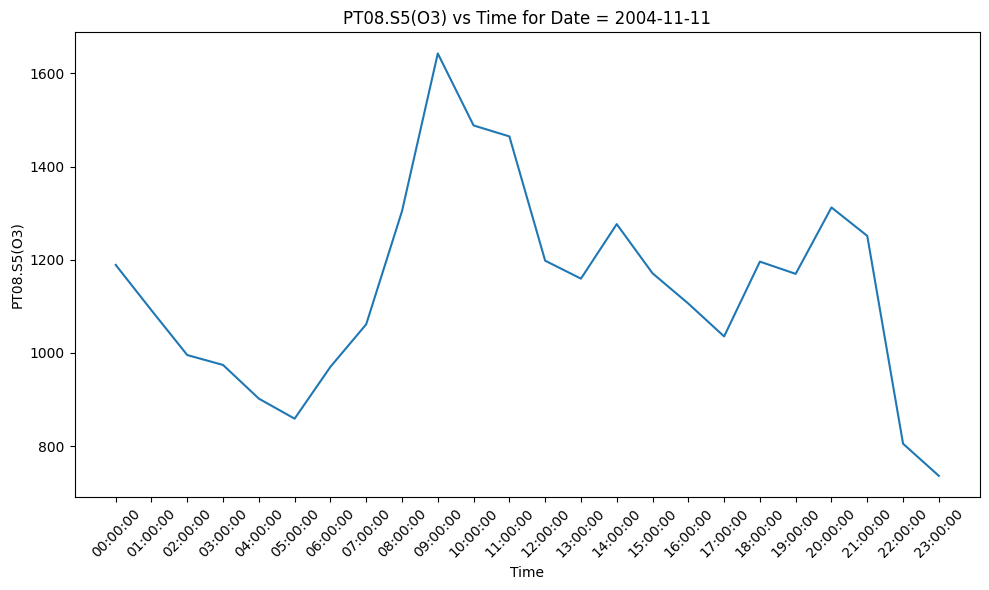

In [80]:

# List of columns to plot against 'Time'/'Date'
columns = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
           'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)']

# List of specific dates
specific_dates = ['2004-03-11','2004-05-11','2004-07-11','2004-09-11','2004-11-11']

filtered_df = train[train['Date'].isin(specific_dates)]

# Plot line graphs for each specific date value for each column
for column in columns:
    for date_value in specific_dates:
        plt.figure(figsize=(10, 6))
        sns.lineplot(data=filtered_df[filtered_df['Date'] == date_value], x='Time', y=column)
        plt.xlabel('Time')
        plt.ylabel(column)
        plt.title(f'{column} vs Time for Date = {date_value}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


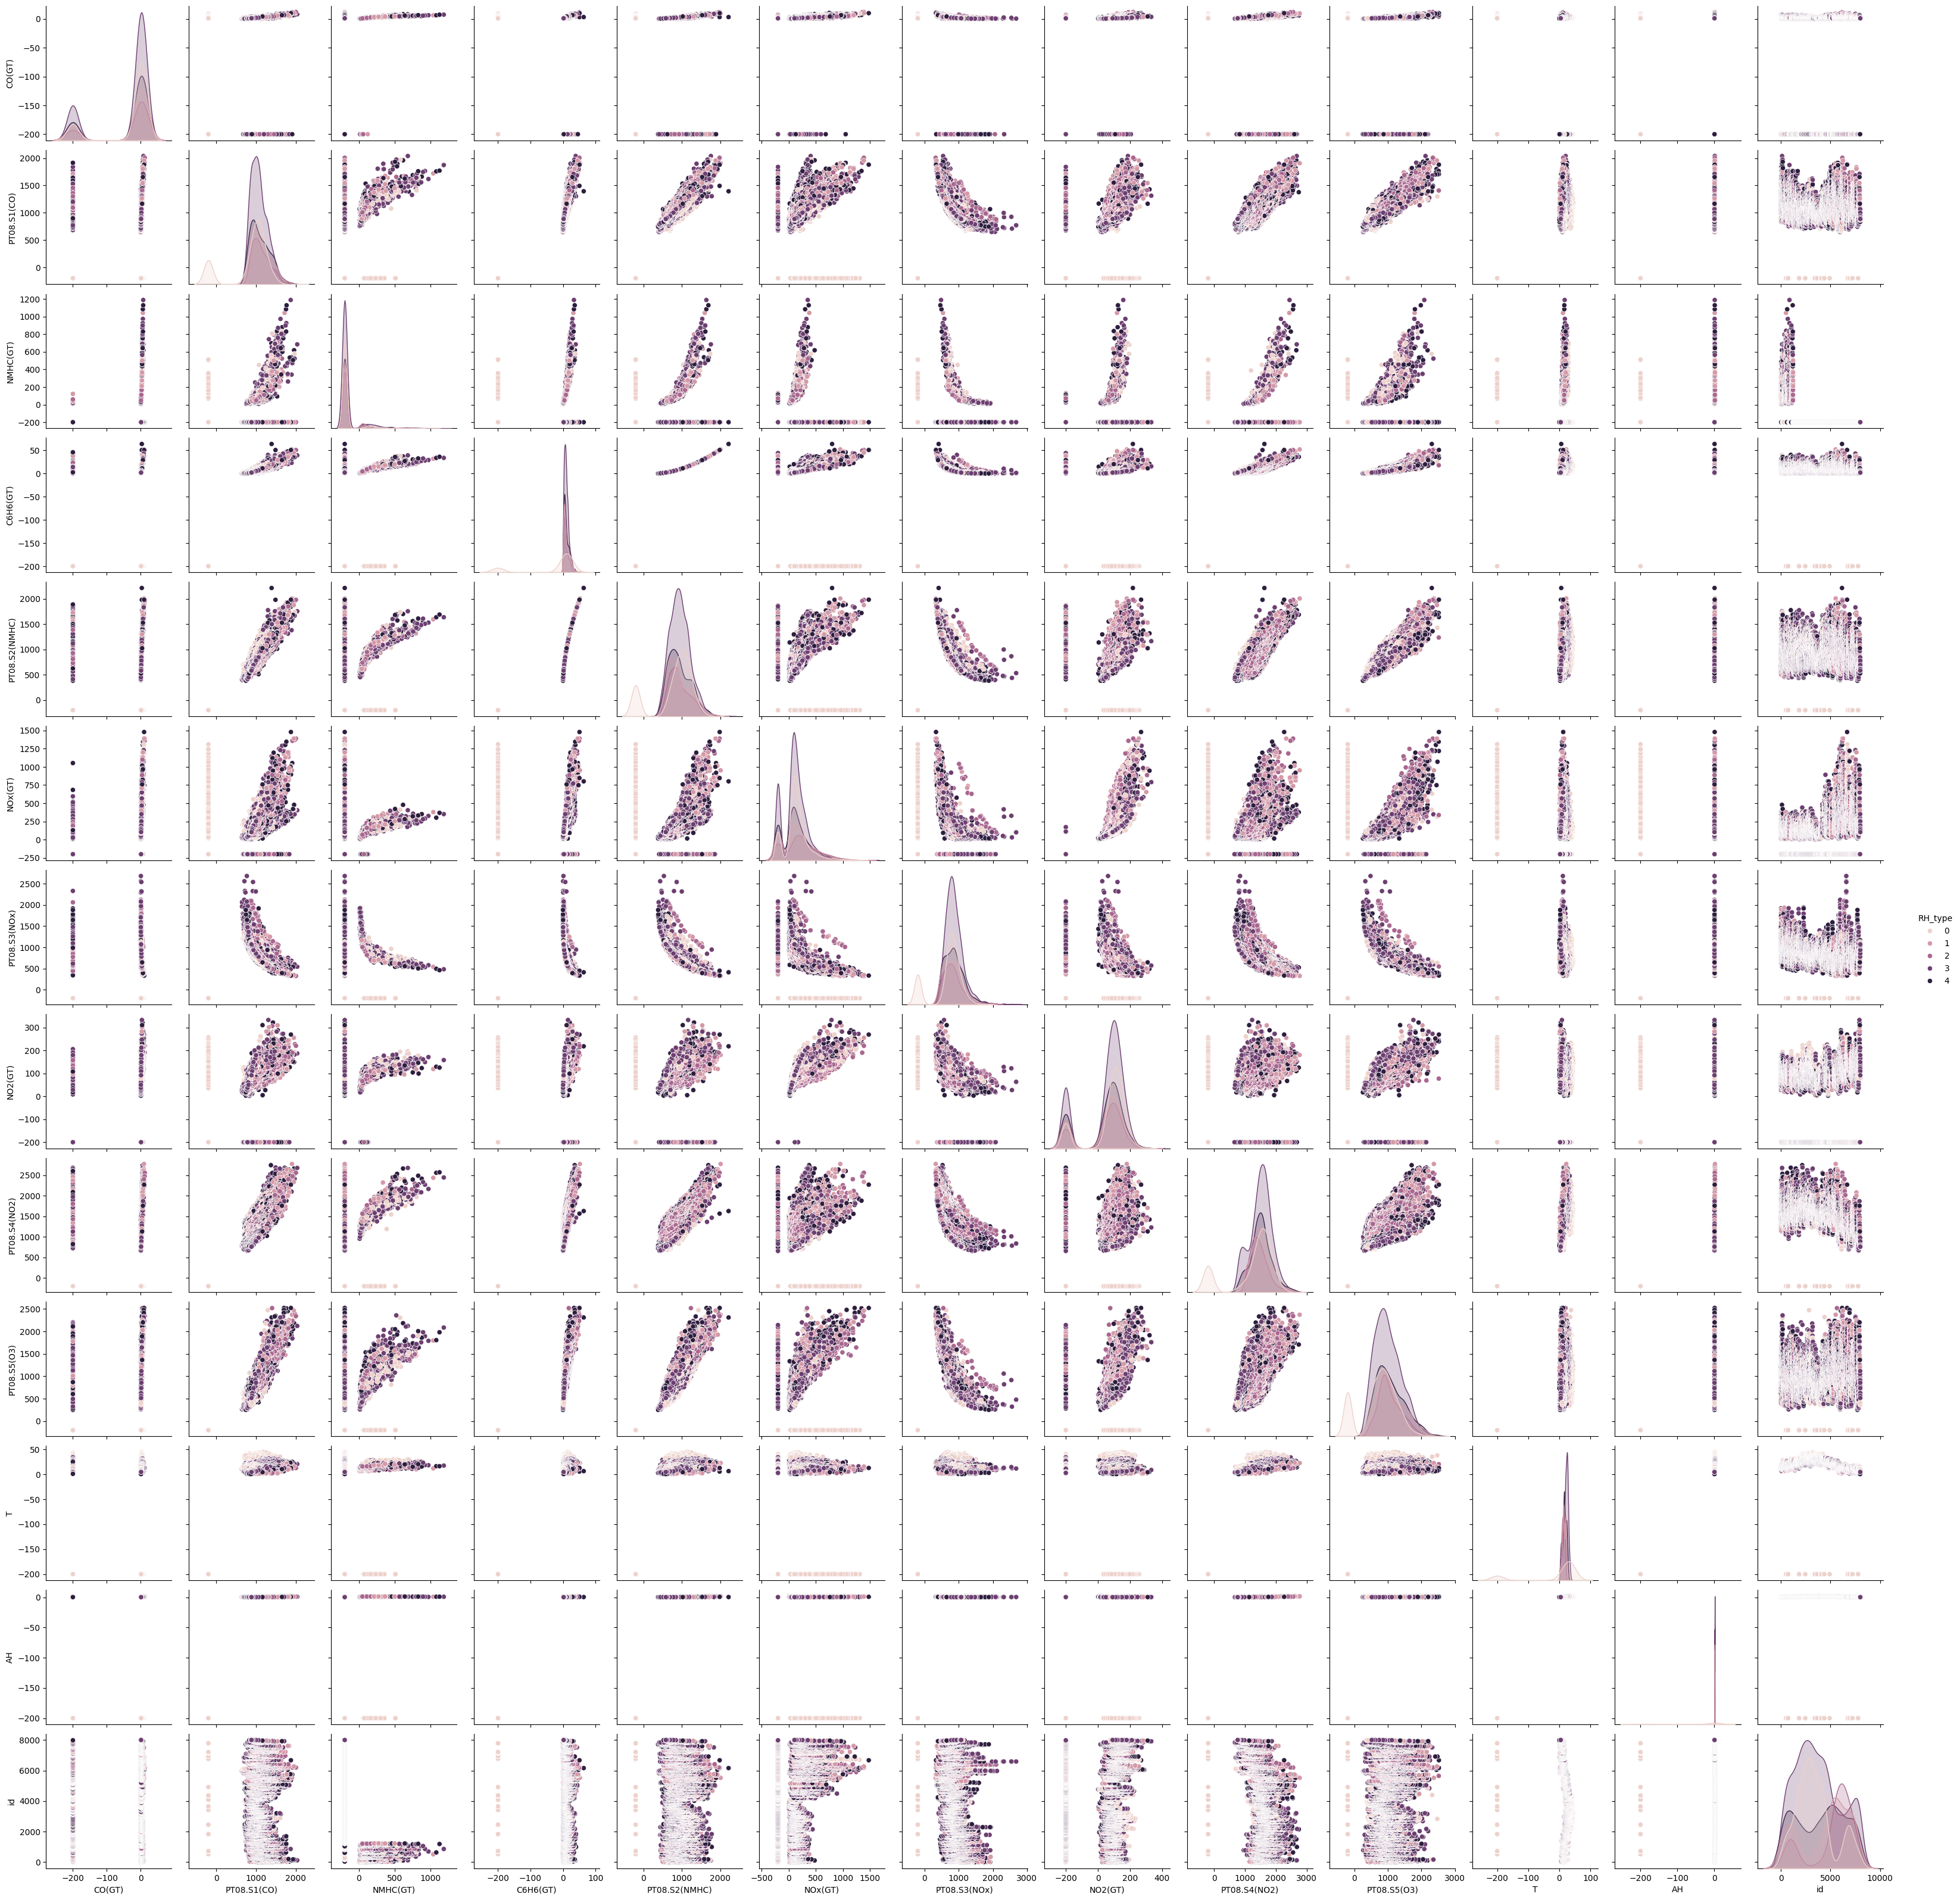

In [ ]:
sns.pairplot(train, hue='RH_type')

<ipython-input-43-1df3d0bfd6af>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr())


<Axes: >

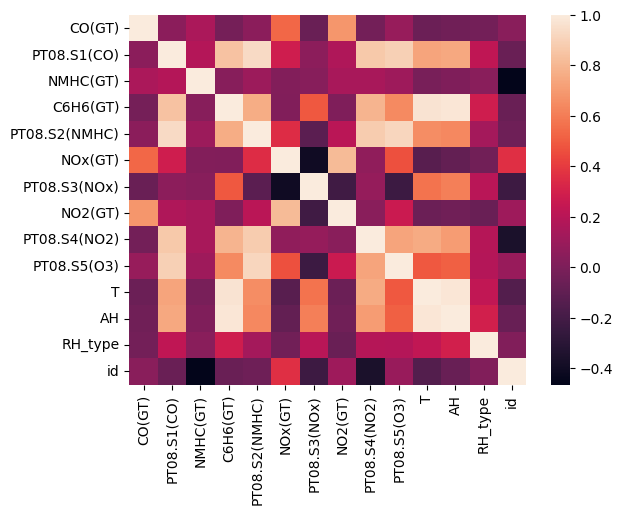

In [ ]:
sns.heatmap(train.corr())

In [23]:
from sklearn.model_selection import train_test_split

X = train.drop(columns=['RH_type' , 'id','Date' ,'Time'])
y = train['RH_type']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=56)


In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6800, 12)
(1200, 12)
(6800,)
(1200,)


In [25]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [26]:
# Initialize individual classifiers
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
rf_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)
linear_clf = DecisionTreeClassifier()  #  linear classifier
xgb_clf = XGBClassifier()  # XGBoost classifier

# Create a voting classifier with hard voting
voting_clf_hard = VotingClassifier(
    estimators=[
        ('lr', log_reg),
        ('rf', rf_clf),
        ('svm', svm_clf),
        ('linear', linear_clf),
        ('xgb', xgb_clf)
    ],
    voting='hard'
)

# Create a voting classifier with soft voting
voting_clf_soft = VotingClassifier(
    estimators=[
        ('lr', log_reg),
        ('rf', rf_clf),
        ('svm', svm_clf),
        ('linear', linear_clf),
        ('xgb', xgb_clf)
    ],
    voting='soft'
)

# Train
voting_clf_hard.fit(X_train, y_train)
voting_clf_soft.fit(X_train, y_train)

# predictions
y_pred_hard = voting_clf_hard.predict(X_test)
y_pred_soft = voting_clf_soft.predict(X_test)

# accuracy
accuracy_hard = accuracy_score(y_test, y_pred_hard)
accuracy_soft = accuracy_score(y_test, y_pred_soft)

print("Accuracy of hard voting classifier:", accuracy_hard)
print("Accuracy of soft voting classifier:", accuracy_soft)

Accuracy of hard voting classifier: 0.9216666666666666
Accuracy of soft voting classifier: 0.9466666666666667


In [52]:
from sklearn.model_selection import cross_val_score

# Perform 10-fold cross-validation for soft voting classifier
cv_scores_soft = cross_val_score(voting_clf_soft, X_train, y_train, cv=10)

print("Cross-validation scores for soft voting classifier:", cv_scores_soft)
print("Max accuracy of soft voting classifier:", cv_scores_soft.max())

Cross-validation scores for soft voting classifier: [0.94558824 0.95294118 0.92352941 0.94117647 0.92794118 0.95441176
 0.94264706 0.93970588 0.94117647 0.93235294]
Max accuracy of soft voting classifier: 0.9544117647058824


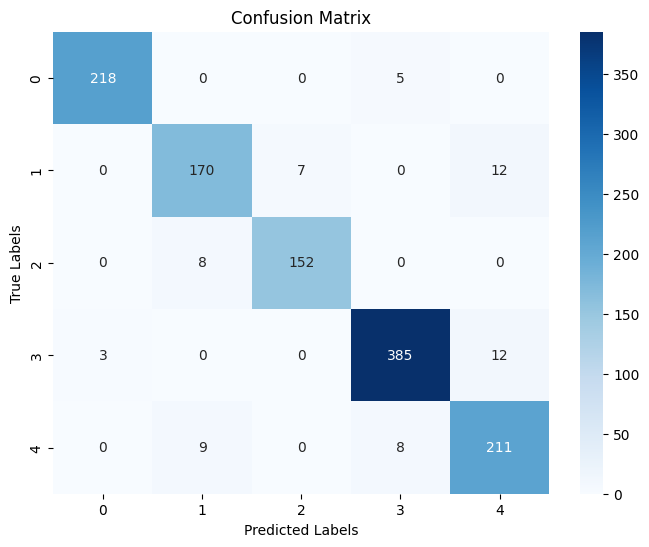

In [65]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_soft)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [71]:
from sklearn.metrics import precision_score, f1_score
precision = precision_score(y_test, y_pred_soft,average= 'macro')
f1_score = f1_score(y_test, y_pred_soft,average= 'macro')

print("Precision :")
print(precision)

print("F1 score :")
print(f1_score)


Precision :
0.9433400230134676
F1 score :
0.9431149444984532


In [56]:
test.tail()

Unnamed: 0        Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  \
1352        9352  2005-04-04  10:00:00     3.1      1314.25      -200   
1353        9353  2005-04-04  11:00:00     2.4      1162.50      -200   
1354        9354  2005-04-04  12:00:00     2.4      1142.00      -200   
1355        9355  2005-04-04  13:00:00     2.1      1002.50      -200   
1356        9356  2005-04-04  14:00:00     2.2      1070.75      -200   

       C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
1352  13.529605        1101.25    471.7        538.50    189.8       1374.25   
1353  11.355157        1027.00    353.3        603.75    179.2       1263.50   
1354  12.374538        1062.50    293.0        603.25    174.7       1240.75   
1355   9.547187         960.50    234.5        701.50    155.7       1041.00   
1356  11.932060        1047.25    265.2        654.00    167.7       1128.50   

      PT08.S5(O3)       T        AH    id  
1352      1728.50  21.850  0.756824  1353  
1353      1269.00  24.325  0.711864  1354  
1354      1092.00  26.900  0.640649  1355  
1355       769.75  28.325  0.513866  1356  
1356       816.00  28.500  0.502804  1357

In [57]:
test1 = test.drop(['id', 'Date', 'Time', 'Unnamed: 0'], axis=1)

test_predictions = voting_clf_soft.predict(test1)
predictions_df = pd.DataFrame({'id': test['id'], 'RH_type': test_predictions})
print(predictions_df)


        id  RH_type
0        1        3
1        2        3
2        3        3
3        4        3
4        5        3
...    ...      ...
1352  1353        0
1353  1354        0
1354  1355        0
1355  1356        0
1356  1357        0

[1357 rows x 2 columns]


In [ ]:
def encode_rh_type(rh_type):
    encoding_dict = {
        'Dry': 0,
        'Elevated': 1,
        'High': 2,
        'Ideal': 3,
        'Slightly Elevated': 4
    }
    reverse_encoding_dict = {v: k for k, v in encoding_dict.items()}
    return reverse_encoding_dict.get(rh_type)

predictions_df['RH_type']  = predictions_df['RH_type'].apply(encode_rh_type)


In [60]:
predictions_df

id RH_type
0        1   Ideal
1        2   Ideal
2        3   Ideal
3        4   Ideal
4        5   Ideal
...    ...     ...
1352  1353     Dry
1353  1354     Dry
1354  1355     Dry
1355  1356     Dry
1356  1357     Dry

[1357 rows x 2 columns]

In [62]:
predictions_df.to_csv('predictions_ML Hackathon.csv', index=False)